# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [1]:

import pandas as pd
import datetime
import yfinance as yf


def get_historical_data(symbol, start_date, end_date):
    """
    Fetches historical stock data using the yfinance library.
    
    Args:
        symbol (str): Stock ticker symbol (e.g., 'GOOGL').
        start_date (str): Start date in 'yyyy-mm-dd' format.
        end_date (str): End date in 'yyyy-mm-dd' format.
    
    Returns:
        pd.DataFrame: A DataFrame containing historical stock data.
    """
    symbol = symbol.upper()
    data = yf.download(symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)  # Move the Date from the index to a column
    return data

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [2]:
data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

[*********************100%***********************]  1 of 1 completed


**Step 3:** Write the data to a csv file.

In [3]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [4]:
import pandas as pd
import numpy as np

# Read the CSV file
try:
    data = pd.read_csv('google.csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: File 'google.csv' not found. Please check the file path.")
    exit()

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Clean and preprocess the data
# Convert columns to numeric (if they contain strings or invalid values, they will be converted to NaN)
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')



if data.empty:
    print("\nError: No valid data after cleaning. Please check the input file.")
    exit()

# Calculate and display statistics
print("\nStatistics:")
for col in columns_to_convert:
    mean_value = np.mean(data[col])
    std_dev = np.std(data[col])
    max_value = np.max(data[col])
    min_value = np.min(data[col])

    print(f"{col.capitalize()} --- Mean: {mean_value:.2f}, Std: {std_dev:.2f}, Max: {max_value:.2f}, Min: {min_value:.2f}")


File loaded successfully!

First few rows of the dataset:
         Date              Close               High                Low  \
0         NaN              GOOGL              GOOGL              GOOGL   
1  2005-01-03  5.054499626159668  5.077688553531345  4.873722726031057   
2  2005-01-04  4.849786281585693  5.059985649265817  4.824353858057379   
3  2005-01-05  4.825101852416992  4.909629057209678  4.793185538407283   
4  2005-01-06  4.701425075531006   4.88469444151674  4.680730024126535   

                 Open     Volume  
0               GOOGL      GOOGL  
1   4.922096537991378  633134232  
2   5.021835826186188  549685764  
3     4.8236052406936  329134536  
4  4.8642488253936715  415068516  

Statistics:
Open --- Mean: 19.05, Std: 10.62, Max: 50.09, Min: 4.37
High --- Mean: 19.21, Std: 10.68, Max: 50.25, Min: 4.45
Low --- Mean: 18.86, Std: 10.55, Max: 49.65, Min: 4.30
Close --- Mean: 19.04, Std: 10.62, Max: 50.03, Min: 4.36
Volume --- Mean: 157408524.49, Std: 160104731.53, 

**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [5]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item       Open      Close      Volume
0     0  47.395689  46.721630  64134000.0
1     1  47.361313  47.876942  54912000.0
2     2  47.906339  47.233276  48872000.0
3     3  49.321205  48.428940  30358000.0
4     4  48.598825  49.126411  31280000.0
---
      Item      Open     Close       Volume
3141  3141  4.864249  4.701425  415068516.0
3142  3142  4.823605  4.825102  329134536.0
3143  3143  5.021836  4.849786  549685764.0
3144  3144  4.922097  5.054500  633134232.0
3145  3145       NaN       NaN          NaN


**Step 2: ** Visualise raw data.

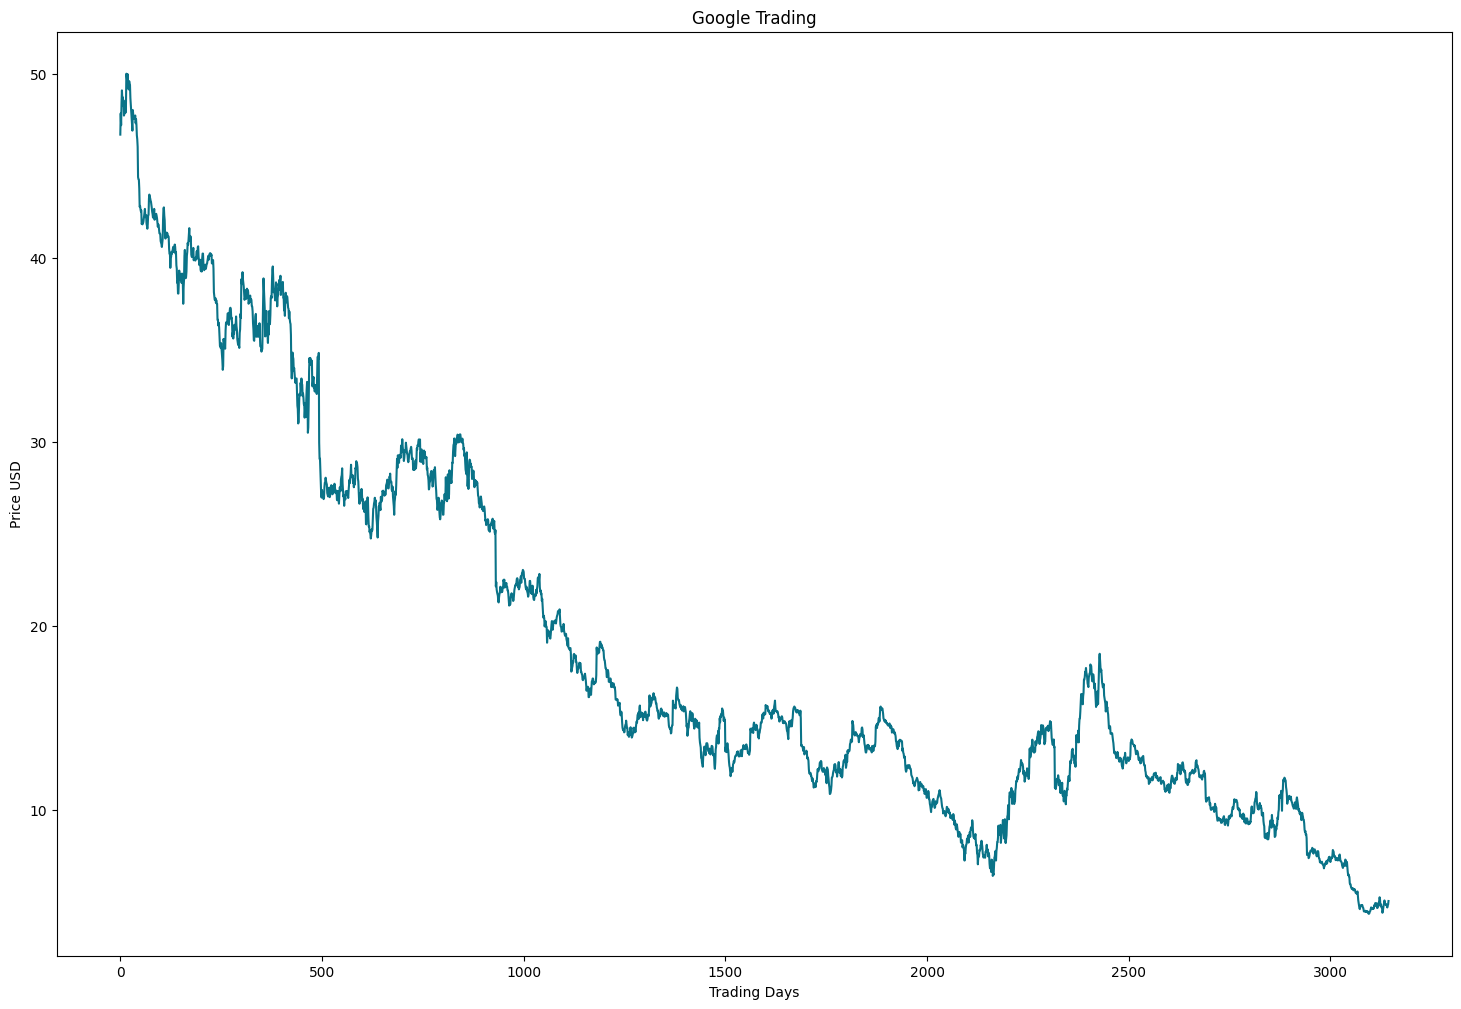

In [6]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [7]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.941008  0.927501  0.032906
1     1  0.940256  0.952798  0.027257
2     2  0.952177  0.938704  0.023557
3     3  0.983122  0.964885  0.012217
4     4  0.967322  0.980157  0.012782


Open   --- mean : 0.3209656650183931   	 Std:  0.23237054206030783   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3213300570098339   	 Std:  0.23259526974653033   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.09003767253396143   	 Std:  0.0980666545611495   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

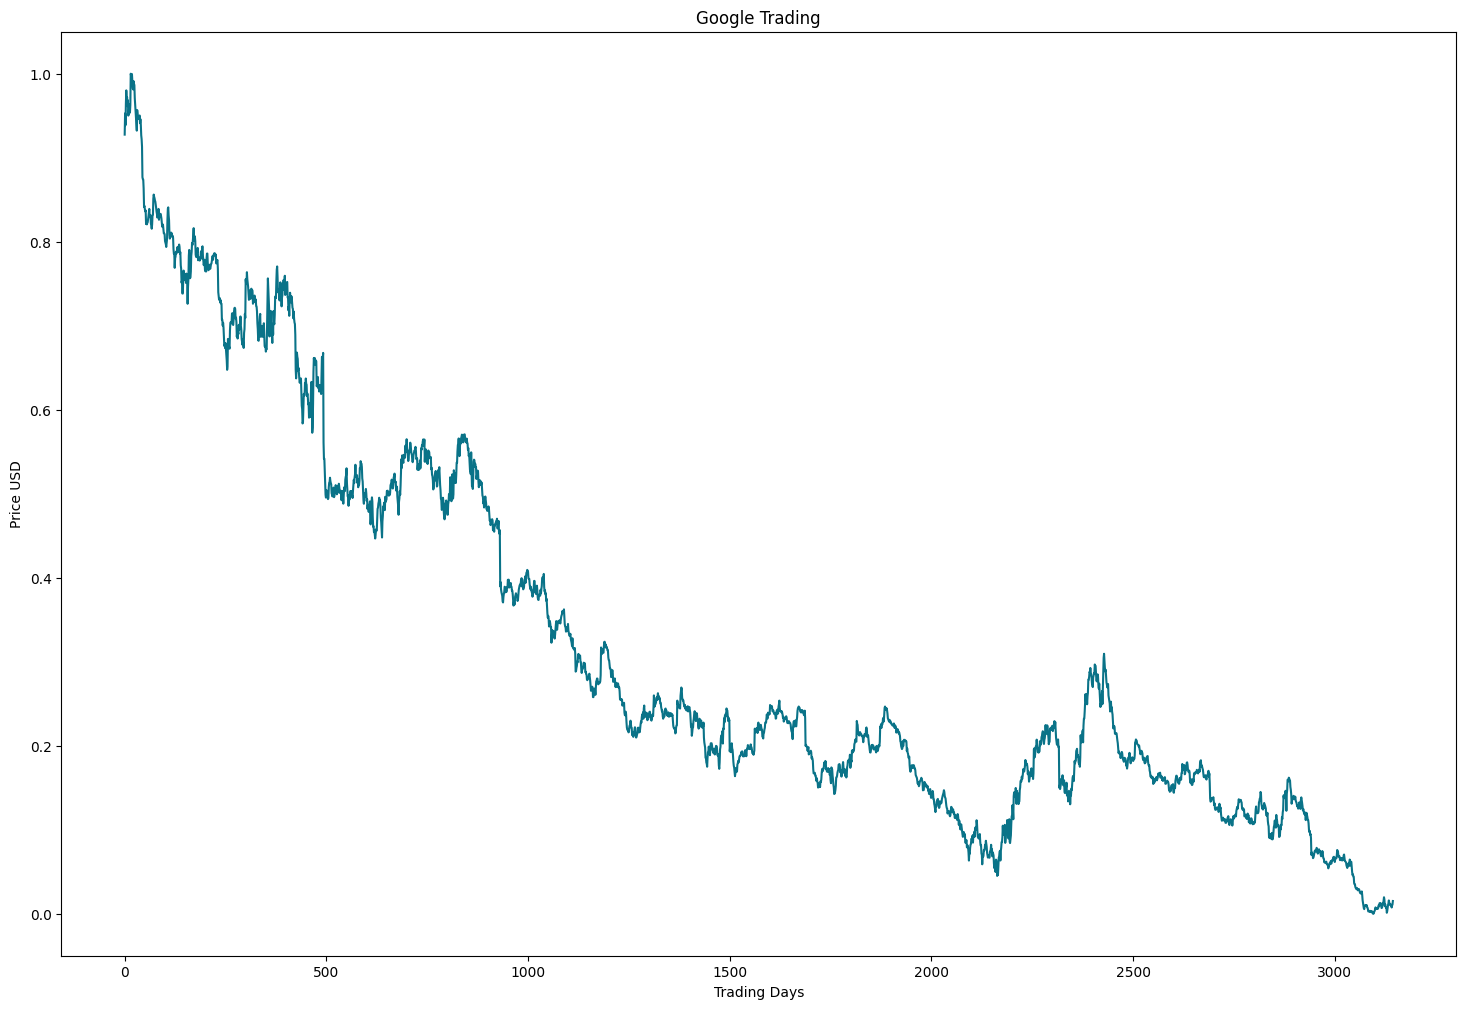

In [8]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [9]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

Item      Open     Close    Volume
0     0  0.941008  0.927501  0.032906
1     1  0.940256  0.952798  0.027257
2     2  0.952177  0.938704  0.023557
3     3  0.983122  0.964885  0.012217
4     4  0.967322  0.980157  0.012782

**Step 2:** Split data into train and test pair

In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2156, 1)
y_train (2156, 1)
x_test (990, 1)
y_test (990, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [ ]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [13]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

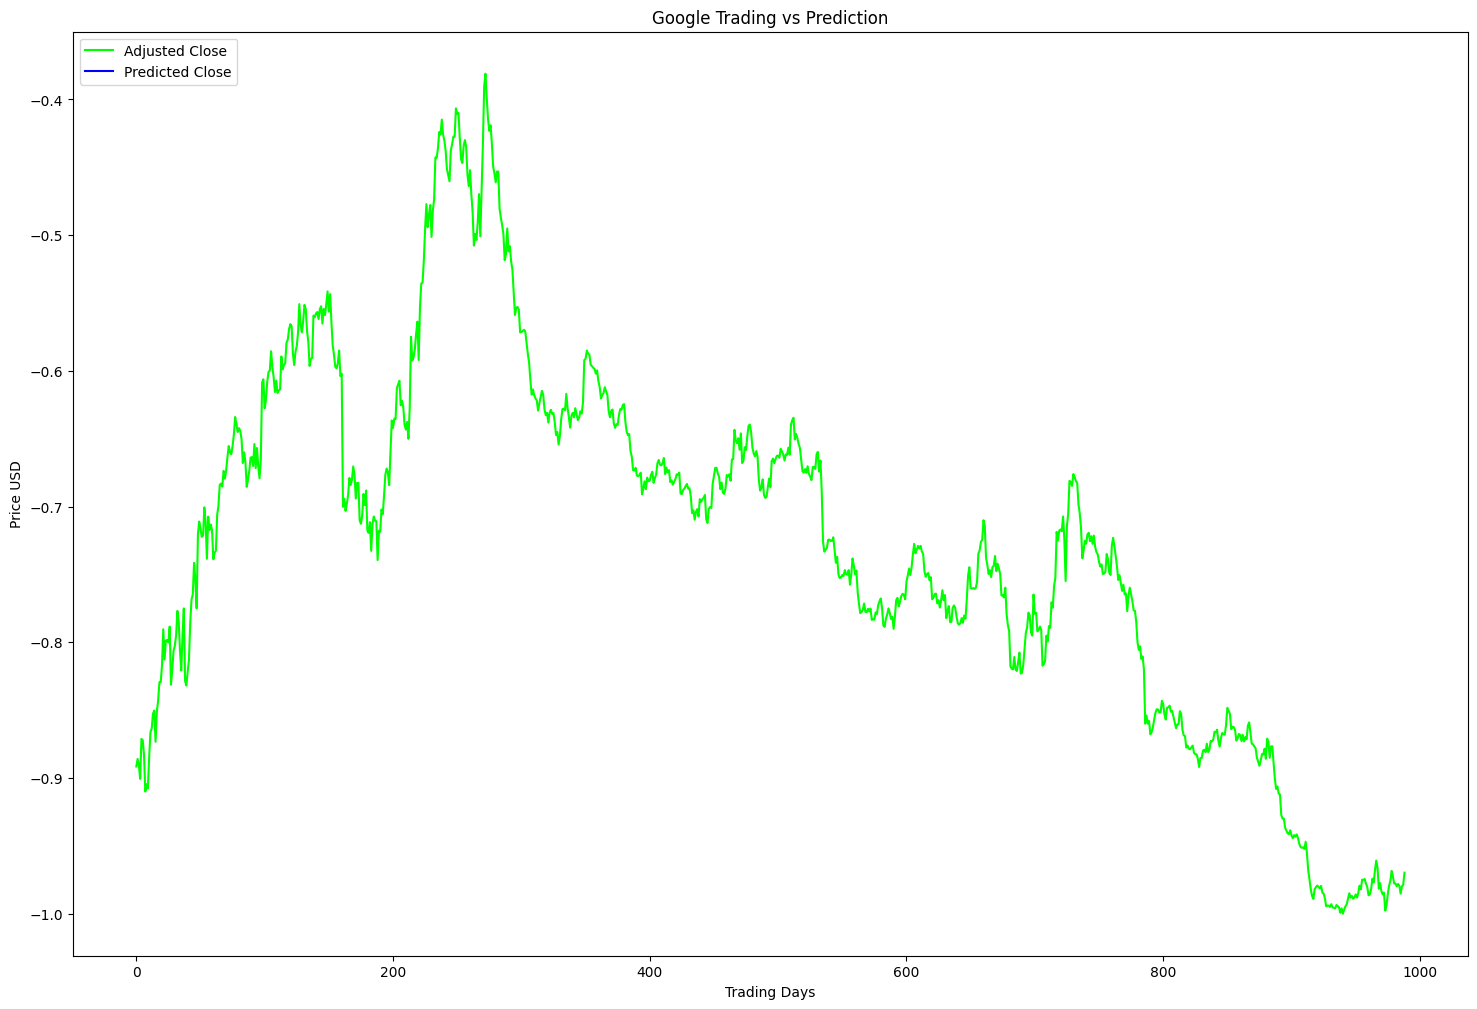

In [14]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [15]:
#test
import numpy as np

# Handle NaN values using NumPy
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
predictions = np.nan_to_num(predictions, nan=0)
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))



In [16]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7408 MSE (0.8607 RMSE)
Test Score: 0.54632504 MSE (0.73913804 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [ ]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [18]:
# X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

# unroll_length = 50
# X_train = sd.unroll(X_train, unroll_length)
# X_test = sd.unroll(X_test, unroll_length)
# y_train = y_train[-X_train.shape[0]:]
# y_test = y_test[-X_test.shape[0]:]

# print("x_train", X_train.shape)
# print("y_train", y_train.shape)
# print("x_test", X_test.shape)
# print("y_test", y_test.shape)
# Split the data using the provided function
X_train, X_test, y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

# Unroll data for LSTM (ensure these functions are implemented correctly)
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)

# Ensure that y_train and y_test match the shape of X_train and X_test
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

# Output the shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2590, 50, 3)
y_train shape: (2590,)
X_test shape: (446, 50, 3)
y_test shape: (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [19]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compilation time :  0.015621423721313477


**Step 4:** Train the model

In [20]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - loss: 0.0151 - val_loss: 9.8982e-05


**Step 5:** make prediction using test data

In [21]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


**Step 6:** Plot the results

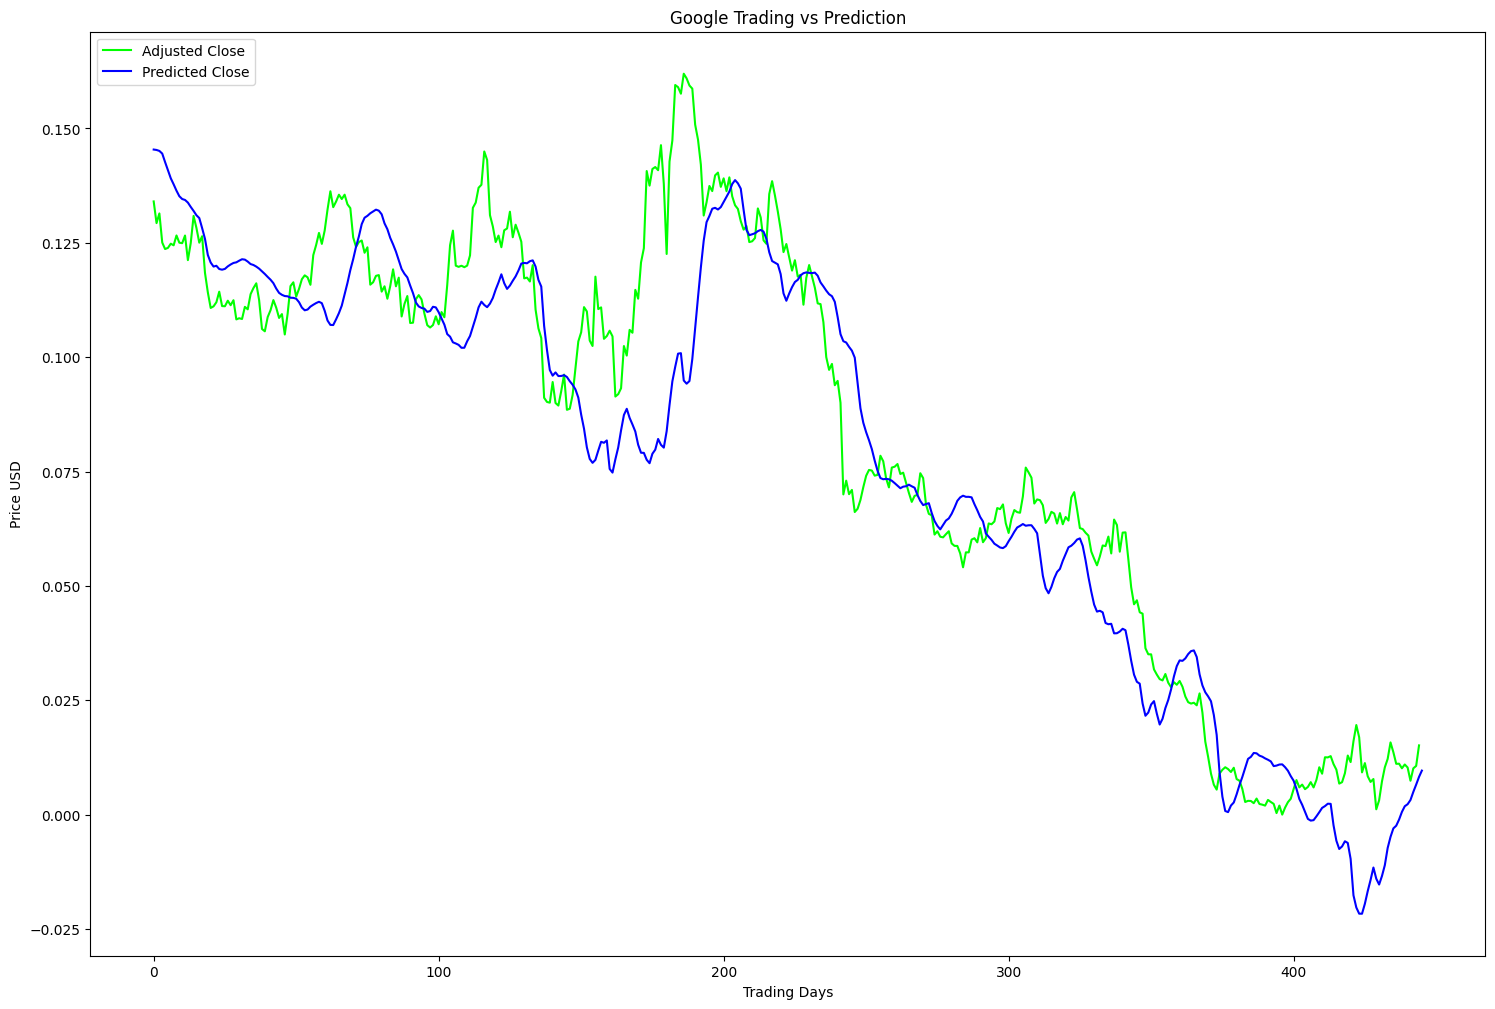

In [22]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [23]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00053793 MSE (0.02319338 RMSE)
Test Score: nan MSE (nan RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [24]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.01697516441345215


**Step 2: ** Train improved LSTM model

In [25]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
25/25 - 14s - 564ms/step - loss: 0.0193 - val_loss: 3.1681e-04
Epoch 2/5
25/25 - 4s - 178ms/step - loss: 0.0021 - val_loss: 2.1582e-04
Epoch 3/5
25/25 - 4s - 176ms/step - loss: 0.0014 - val_loss: 9.3653e-05
Epoch 4/5
25/25 - 4s - 179ms/step - loss: 0.0015 - val_loss: 9.4176e-05
Epoch 5/5
25/25 - 4s - 174ms/step - loss: 0.0013 - val_loss: 8.7006e-05


**Step 3:** Make prediction on improved LSTM model

In [26]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step


**Step 4:** plot the results

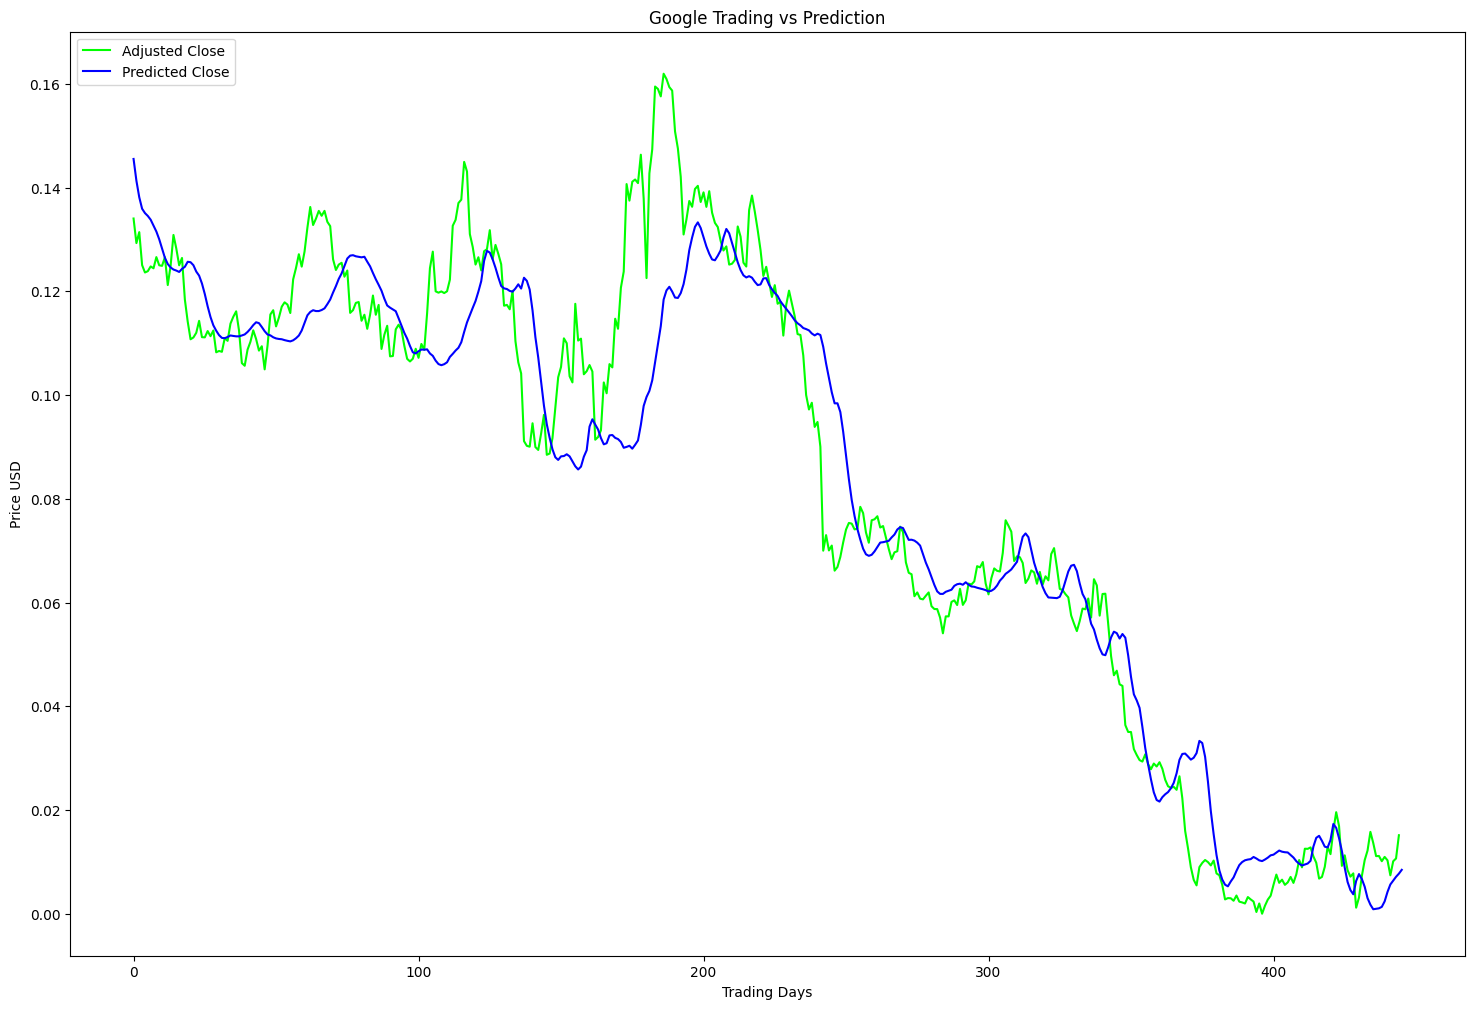

In [27]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [28]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00062571 MSE (0.02501429 RMSE)
Test Score: nan MSE (nan RMSE)


In [29]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: nan - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [30]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

# Preprocess the data
stocks = ppd.remove_data(data)
stocks = ppd.get_normalised_data(stocks)

# Drop the 'Item' column
stocks = stocks.drop(['Item'], axis=1)

# Print the dataframe head
print(stocks.head())

# Convert DataFrame to NumPy arrays
X = stocks.values  # Use .values to get NumPy array from DataFrame
Y = stocks['Close'].to_numpy()  # Use .to_numpy() to get NumPy array for 'Close' column

# Unroll the data for LSTM (ensure 'sd.unroll' is defined correctly)
X = sd.unroll(X, 1)
Y = Y[-X.shape[0]:]

# Print the shapes of X and Y to verify
print(X.shape)
print(Y.shape)

# Generate predictions (ensure the model is defined and trained)
predictions = model.predict(X)

# Get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
Test Score: 0.3863 MSE (0.6215 RMSE)


**MODEL : SIMPLE DENSE NEURAL NETWORK**

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Model 1: Simple Dense Neural Network
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))  # First Dense Layer
model1.add(Dense(64, activation='relu'))  # Second Dense Layer
model1.add(Dense(1))  # Output Layer

model1.compile(optimizer='adam', loss='mean_squared_error')  # Compile the Model
print("Model 1 (Dense Neural Network) compiled.")


Model 1 (Dense Neural Network) compiled.


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
import numpy as np

# Check shapes of input data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Reshape X_train if needed (for LSTM input)
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    print("Reshaped X_train:", X_train.shape)

# Ensure model input shape matches data
model1 = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
try:
    history1 = model1.fit(
        X_train,
        y_train,
        batch_size=100,
        epochs=5,
        verbose=2,
        validation_split=0.05
    )
    print("Training completed for Model 1.")
except ValueError as e:
    print("ValueError during training:", e)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


X_train shape: (2590, 50, 3)
y_train shape: (2590,)
Epoch 1/5
25/25 - 5s - 219ms/step - loss: 0.0611 - val_loss: 0.0027
Epoch 2/5
25/25 - 1s - 47ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 3/5
25/25 - 1s - 51ms/step - loss: 7.9032e-04 - val_loss: 1.1182e-04
Epoch 4/5
25/25 - 1s - 48ms/step - loss: 6.0311e-04 - val_loss: 1.0190e-04
Epoch 5/5
25/25 - 1s - 50ms/step - loss: 5.7837e-04 - val_loss: 1.0295e-04
Training completed for Model 1.


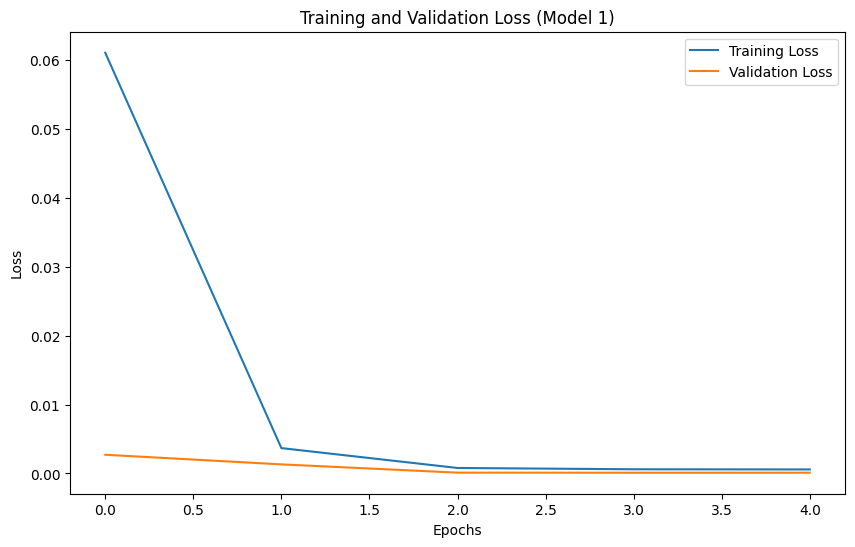

In [33]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [34]:
# Evaluate the model on the training and testing data
train_score1 = model1.evaluate(X_train, y_train, verbose=0)
test_score1 = model1.evaluate(X_test, y_test, verbose=0)

print(f'Model 1 - Train Score: {train_score1:.8f} MSE')
print(f'Model 1 - Test Score: {test_score1:.8f} MSE')


Model 1 - Train Score: 0.00054930 MSE
Model 1 - Test Score: nan MSE


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


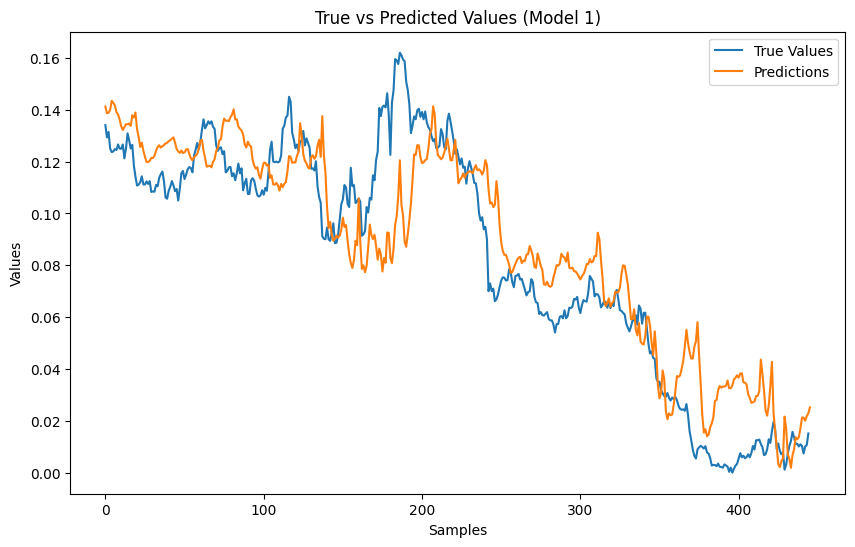

In [35]:
# Generate predictions
predictions1 = model1.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions1, label='Predictions')
plt.title('True vs Predicted Values (Model 1)')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()



**Model 2: Convolutional Neural Network (CNN)**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Model 2: Convolutional Neural Network
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))  # Dense Layer
model2.add(Dense(1))  # Output Layer

model2.compile(optimizer='adam', loss='mean_squared_error')  # Compile the Model
print("Model 2 (CNN) compiled.")


Model 2 (CNN) compiled.


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Train the model
history2 = model2.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=5,
    verbose=2,
    validation_split=0.05
)

# Save the training history
print("Training completed for Model 2.")


Epoch 1/5
25/25 - 3s - 121ms/step - loss: 0.0207 - val_loss: 6.9058e-04
Epoch 2/5
25/25 - 0s - 16ms/step - loss: 0.0016 - val_loss: 1.9661e-04
Epoch 3/5
25/25 - 0s - 16ms/step - loss: 0.0011 - val_loss: 2.3989e-04
Epoch 4/5
25/25 - 0s - 16ms/step - loss: 0.0010 - val_loss: 2.3429e-04
Epoch 5/5
25/25 - 0s - 16ms/step - loss: 0.0010 - val_loss: 2.3303e-04
Training completed for Model 2.


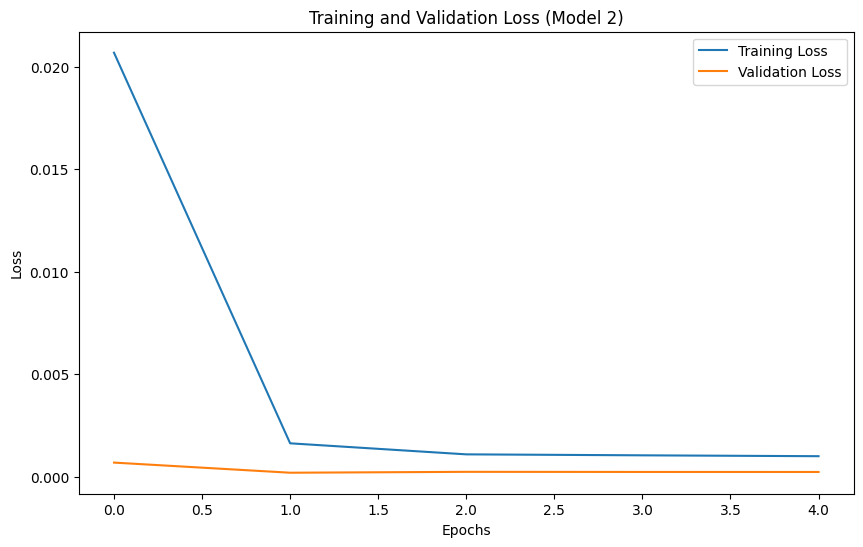

In [38]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [39]:
# Evaluate the model on the training and testing data
train_score2 = model2.evaluate(X_train, y_train, verbose=0)
test_score2 = model2.evaluate(X_test, y_test, verbose=0)

print(f'Model 2 - Train Score: {train_score2:.8f} MSE')
print(f'Model 2 - Test Score: {test_score2:.8f} MSE')


Model 2 - Train Score: 0.00093774 MSE
Model 2 - Test Score: nan MSE


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


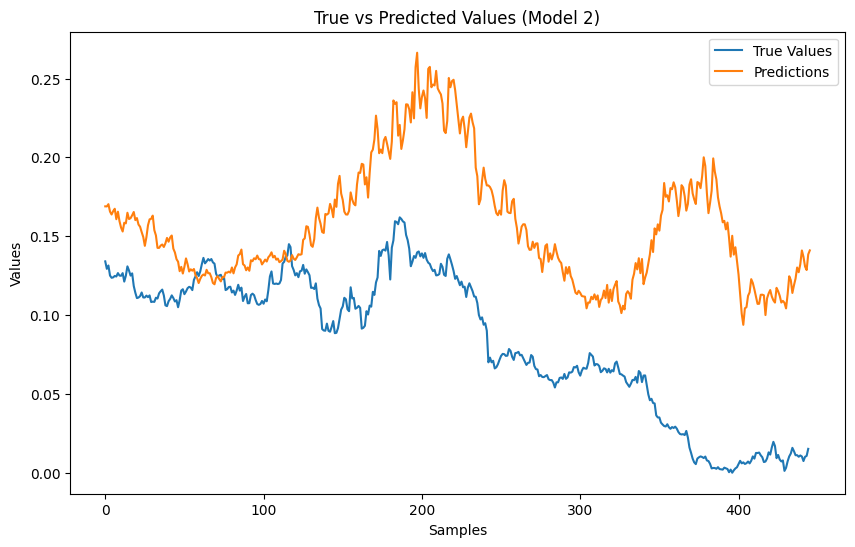

In [40]:
# Generate predictions
predictions2 = model2.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions2, label='Predictions')
plt.title('True vs Predicted Values (Model 2)')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()


**Model 3: Gated Recurrent Unit (GRU)**

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Model 3: GRU
model3 = Sequential()
model3.add(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(GRU(32))  # Another GRU layer without return_sequences
model3.add(Dense(1))  # Output layer

model3.compile(optimizer='adam', loss='mean_squared_error')  # Compile the Model
print("Model 3 (GRU) compiled.")


Model 3 (GRU) compiled.


In [42]:
# Train the model
history3 = model3.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=5,
    verbose=2,
    validation_split=0.05
)

# Save the training history
print("Training completed for Model 3.")


Epoch 1/5
25/25 - 11s - 443ms/step - loss: 0.0347 - val_loss: 1.9811e-04
Epoch 2/5
25/25 - 3s - 103ms/step - loss: 0.0024 - val_loss: 2.5737e-04
Epoch 3/5
25/25 - 3s - 103ms/step - loss: 6.0502e-04 - val_loss: 2.1885e-04
Epoch 4/5
25/25 - 3s - 117ms/step - loss: 4.5665e-04 - val_loss: 8.5818e-05
Epoch 5/5
25/25 - 3s - 117ms/step - loss: 4.3217e-04 - val_loss: 7.6899e-05
Training completed for Model 3.


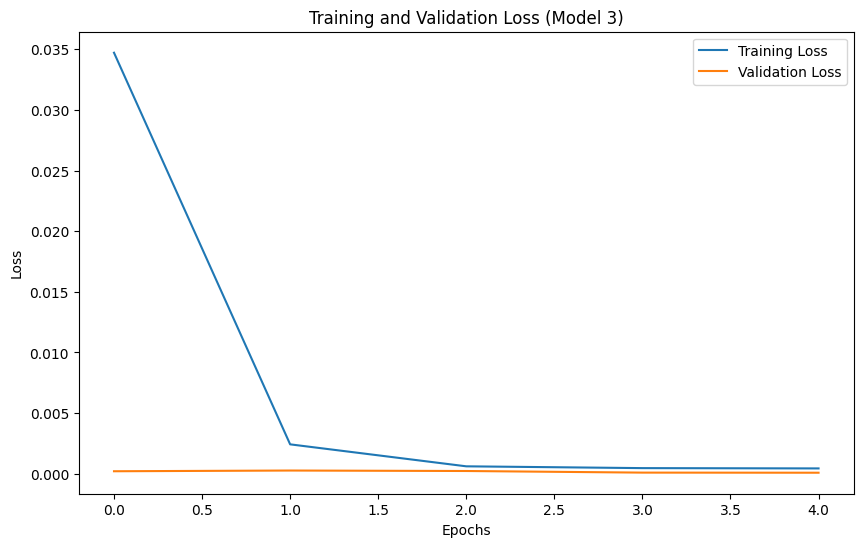

In [43]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
# Evaluate the model on the training and testing data
train_score3 = model3.evaluate(X_train, y_train, verbose=0)
test_score3 = model3.evaluate(X_test, y_test, verbose=0)

print(f'Model 3 - Train Score: {train_score3:.8f} MSE')
print(f'Model 3 - Test Score: {test_score3:.8f} MSE')


Model 3 - Train Score: 0.00040127 MSE
Model 3 - Test Score: nan MSE


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step


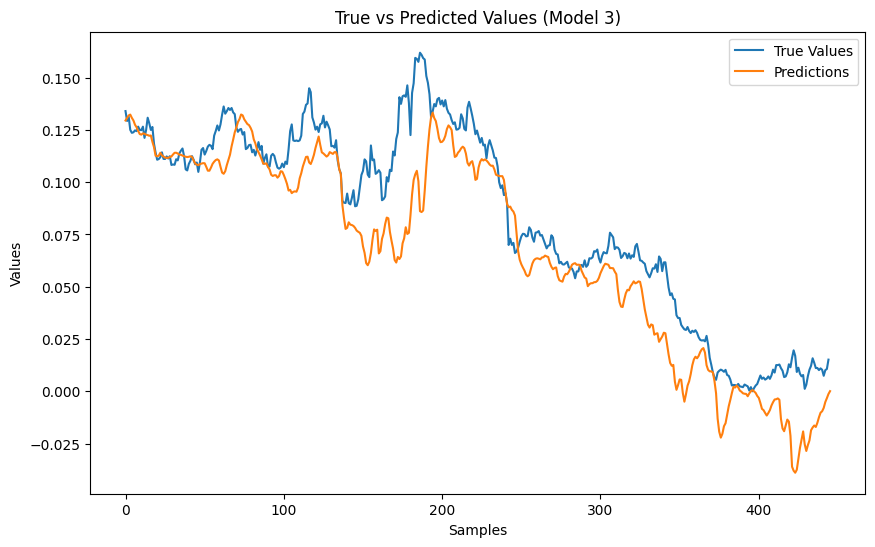

In [45]:
# Generate predictions
predictions3 = model3.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions3, label='Predictions')
plt.title('True vs Predicted Values (Model 3)')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()


**Comparison of Models: LSTM, CNN, GRU**

In [46]:
# Compile results for all models
models_scores = {
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Train Score (MSE)': [trainScore, train_score2, train_score3],
    'Test Score (MSE)': [testScore, test_score2, test_score3],
    'Test Score (RMSE)': [
        math.sqrt(testScore),
        math.sqrt(test_score2),
        math.sqrt(test_score3)
    ]
}

# Create a DataFrame for better readability
import pandas as pd
scores_df = pd.DataFrame(models_scores)
print(scores_df)


  Model  Train Score (MSE)  Test Score (MSE)  Test Score (RMSE)
0  LSTM           0.000626          0.386299            0.62153
1   CNN           0.000938               NaN                NaN
2   GRU           0.000401               NaN                NaN


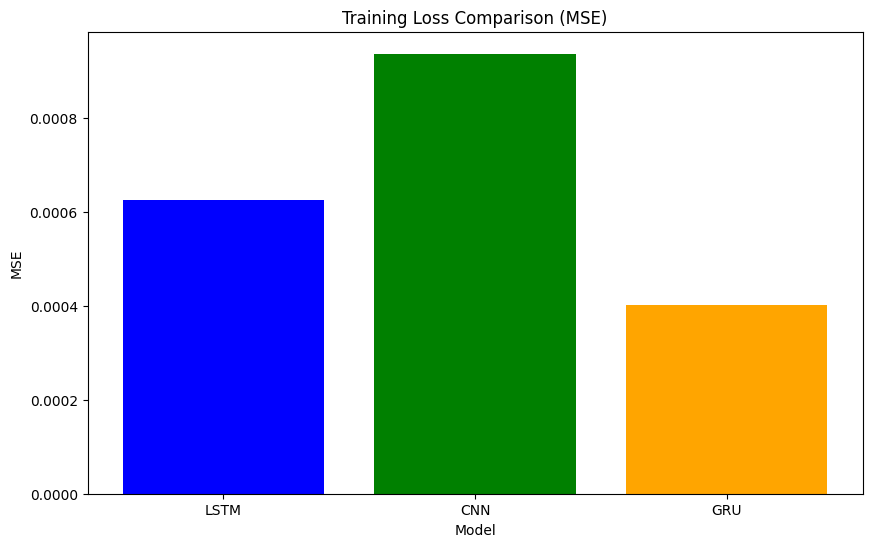

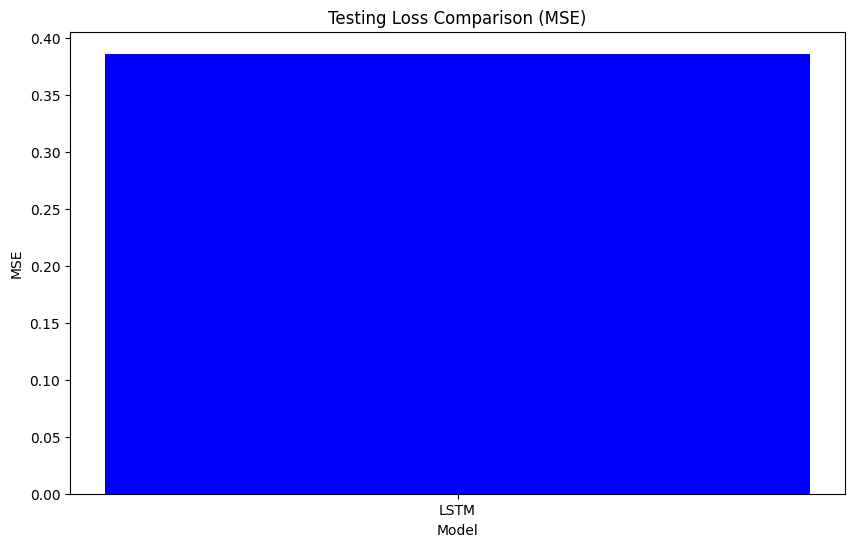

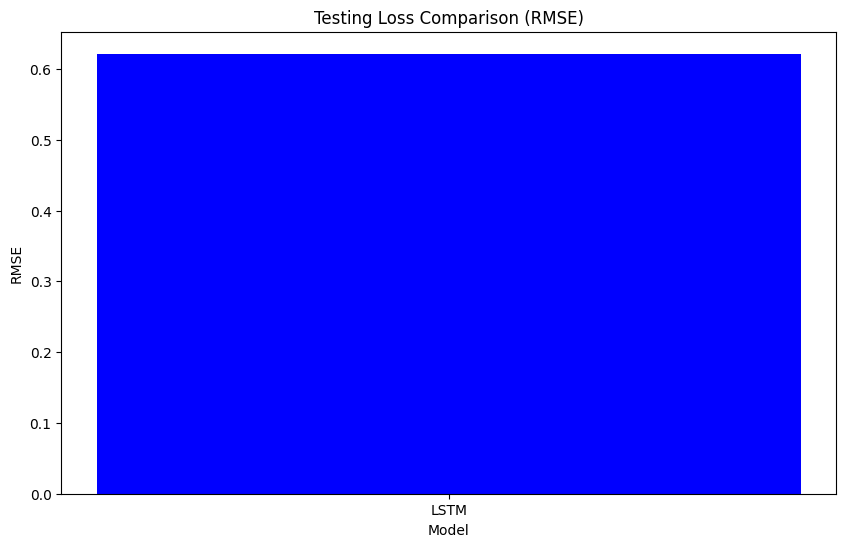

In [47]:
# Visualize the training and testing losses for all models
x_labels = ['LSTM', 'CNN', 'GRU']

# Bar chart for training scores
plt.figure(figsize=(10, 6))
plt.bar(x_labels, models_scores['Train Score (MSE)'], color=['blue', 'green', 'orange'])
plt.title('Training Loss Comparison (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()

# Bar chart for testing scores
plt.figure(figsize=(10, 6))
plt.bar(x_labels, models_scores['Test Score (MSE)'], color=['blue', 'green', 'orange'])
plt.title('Testing Loss Comparison (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()

# Bar chart for RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(x_labels, models_scores['Test Score (RMSE)'], color=['blue', 'green', 'orange'])
plt.title('Testing Loss Comparison (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()


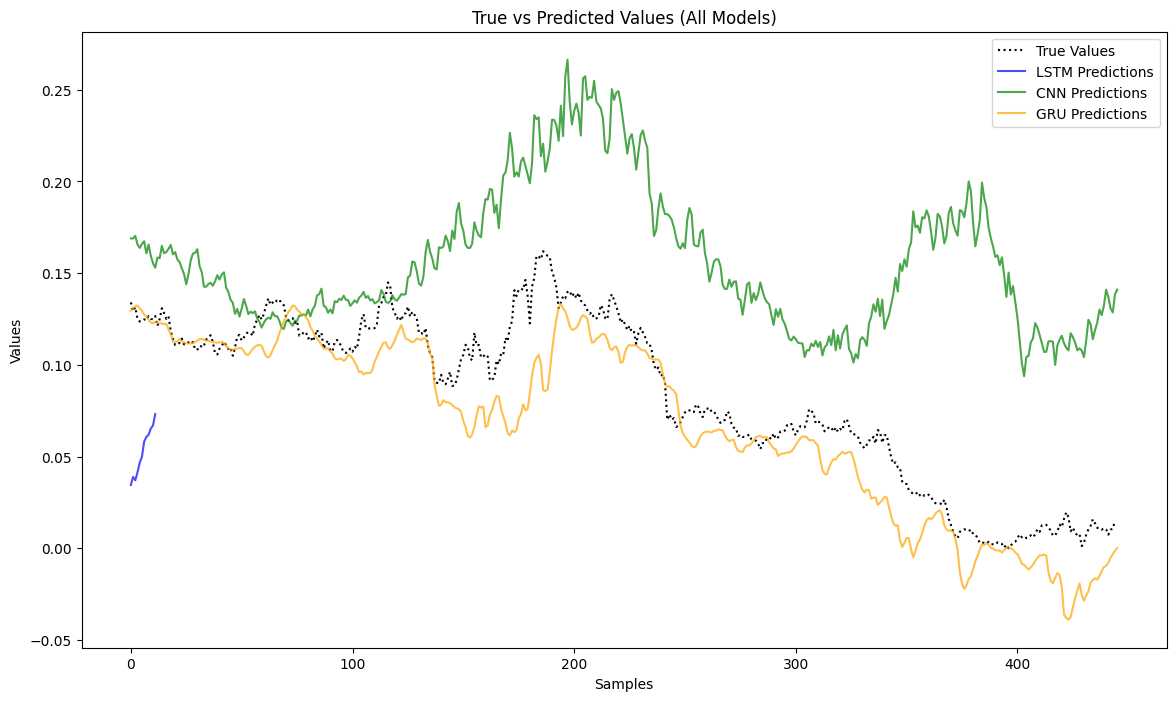

In [48]:
# Plot predictions for all models along with true values
plt.figure(figsize=(14, 8))
plt.plot(y_test, label='True Values', color='black', linestyle='dotted')

# Add predictions from each model
plt.plot(predictions, label='LSTM Predictions', color='blue', alpha=0.7)
plt.plot(predictions2, label='CNN Predictions', color='green', alpha=0.7)
plt.plot(predictions3, label='GRU Predictions', color='orange', alpha=0.7)

plt.title('True vs Predicted Values (All Models)')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()


In [49]:
# Print key insights
best_model_idx = scores_df['Test Score (MSE)'].idxmin()
best_model = scores_df.loc[best_model_idx, 'Model']
print(f"The best performing model is {best_model} with a Test Score (MSE) of {scores_df.loc[best_model_idx, 'Test Score (MSE)']:.4f}.")


The best performing model is LSTM with a Test Score (MSE) of 0.3863.


In [50]:
# Check for NaN or infinite values in the dataset
#print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))  # X_train and y_train
#print(np.any(np.isinf(X_train)), np.any(np.isinf(y_train)))


In [51]:
#print("X_train min:", np.min(X_train), "max:", np.max(X_train))
#print("y_train min:", np.min(y_train), "max:", np.max(y_train))


**Model 4: Recurrent Neural Network (RNN)**

In [52]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Step 1: Generate Sample Data (Replace this with your actual data)
np.random.seed(42)
X = np.random.rand(1000, 10, 5)  # 1000 samples, 10 timesteps, 5 features
y = np.random.rand(1000, 1)  # 1000 target values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Step 2: Define the Simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out, _ = self.rnn(x)  # RNN returns all outputs and last hidden state
        out = self.fc(out[:, -1, :])  # Only use the last time step's output
        return out

# Initialize the RNN model
input_dim = X_train.shape[2]  # Number of features (5 in this case)
hidden_dim = 50  # Number of hidden units
output_dim = 1  # Output size
model = SimpleRNN(input_dim, hidden_dim, output_dim)

# Step 3: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the RNN model
epochs = 5
batch_size = 100
data_pairs = list(zip(X_train_tensor, y_train_tensor))
train_loader = torch.utils.data.DataLoader(data_pairs, batch_size=batch_size, shuffle=True)

epoch = 0
while epoch < epochs:
    model.train()
    total_loss = 0
    batch_index = 0
    # Create an iterator for train_loader
    train_loader_iter = iter(train_loader)
    
    # Use a while loop to iterate over the train_loader
    while batch_index < len(train_loader):
        # Get the next batch using next()
        X_batch, y_batch = next(train_loader_iter)
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        batch_index += 1
        
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")
    epoch += 1


# Step 5: Evaluate the model (optional)
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor)
print(f"Test Loss: {test_loss.item():.4f}")


Epoch 1/5, Loss: 0.1542
Epoch 2/5, Loss: 0.0981
Epoch 3/5, Loss: 0.0877
Epoch 4/5, Loss: 0.0884
Epoch 5/5, Loss: 0.0864
Test Loss: 0.0835


Epoch 1/5, Loss: 0.0857
Epoch 2/5, Loss: 0.0857
Epoch 2/5, Loss: 0.0857
Epoch 3/5, Loss: 0.0857
Epoch 3/5, Loss: 0.0849
Epoch 4/5, Loss: 0.0849
Epoch 4/5, Loss: 0.0845
Epoch 5/5, Loss: 0.0845
Epoch 5/5, Loss: 0.0842
Epoch 6/5, Loss: 0.0842


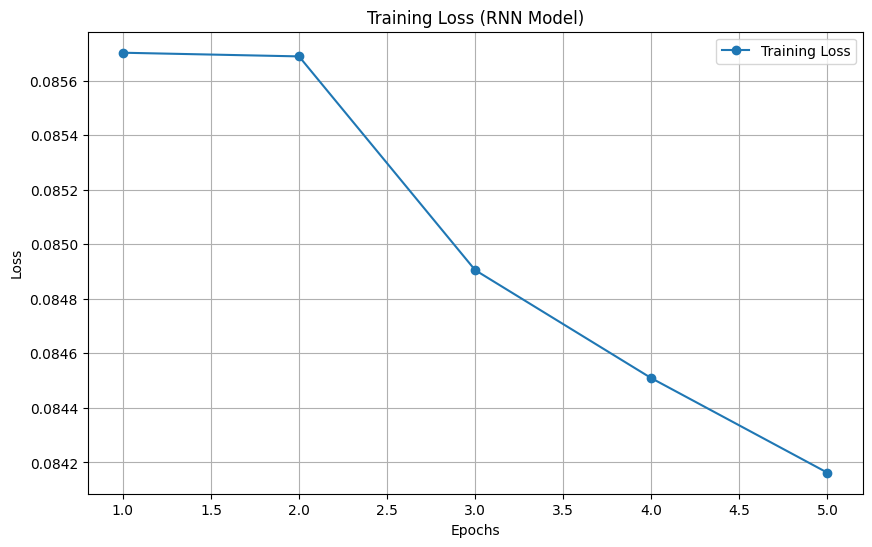

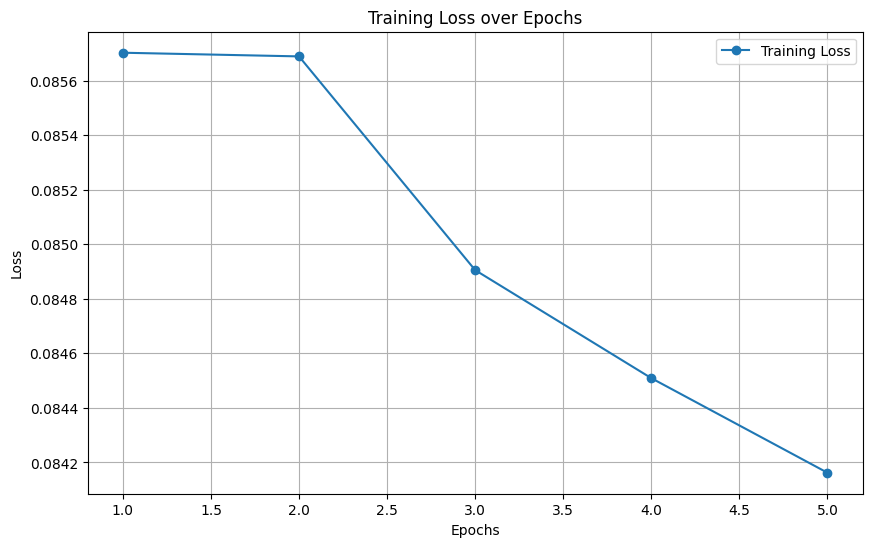

In [53]:
import matplotlib.pyplot as plt

# Lists to store loss values for visualization
train_losses = []

# Training the RNN model with visualization
epoch = 0
while epoch < epochs:
    model.train()
    total_loss = 0
    batch_index = 0
    # Use an iterator over the DataLoader
    train_loader_iter = iter(train_loader)  # Convert the DataLoader to an iterator
    while batch_index < len(train_loader):
        # Get the current batch
        X_batch, y_batch = next(train_loader_iter)  # Get next batch from the iterator
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        batch_index += 1
    
    # Print the loss for the current epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")
    
    # Increment epoch
    epoch += 1


    
    # Record average loss per epoch
    train_losses.append(total_loss / len(train_loader))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

# Plot Training Loss
plt.figure(figsize=(10, 6))

# Using while loop to generate epoch values
epochs_list = []
epoch = 1
while epoch <= epochs:
    epochs_list.append(epoch)
    epoch += 1

# Plotting the training losses
plt.plot(epochs_list, train_losses, label='Training Loss', marker='o')
plt.title('Training Loss (RNN Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
# Evaluate the model and visualize predictions vs. actual values
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_test = y_pred_test.numpy().flatten()
    y_test_actual = y_test_tensor.numpy().flatten()

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot([i+1 for i, _ in enumerate(train_losses)], train_losses, label='Training Loss', marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()





**Model 5: Full GRU**

In [54]:
# Define GRU model
class GRUNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GRUNetwork, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out, _ = self.gru(x)  # GRU returns all outputs and last hidden state
        out = self.fc(out[:, -1, :])  # Only use the last time step's output
        return out

# Initialize model
input_dim = X_train.shape[2]  # Number of features
hidden_dim = 50  # Hidden units
output_dim = 1  # Output size
model3 = GRUNetwork(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)

# Train the model
epoch = 0
while epoch < epochs:
    model3.train()
    total_loss = 0
    batch_index = 0
    # Iterate over the train_loader directly as an iterable
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model3(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        batch_index += 1
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")
    epoch += 1



Epoch 1/5, Loss: 0.3933
Epoch 2/5, Loss: 0.1603
Epoch 3/5, Loss: 0.0906
Epoch 4/5, Loss: 0.0976
Epoch 5/5, Loss: 0.0868


Epoch 1/5, Loss: 0.0868
Epoch 2/5, Loss: 0.0853
Epoch 3/5, Loss: 0.0847
Epoch 4/5, Loss: 0.0848
Epoch 5/5, Loss: 0.0845


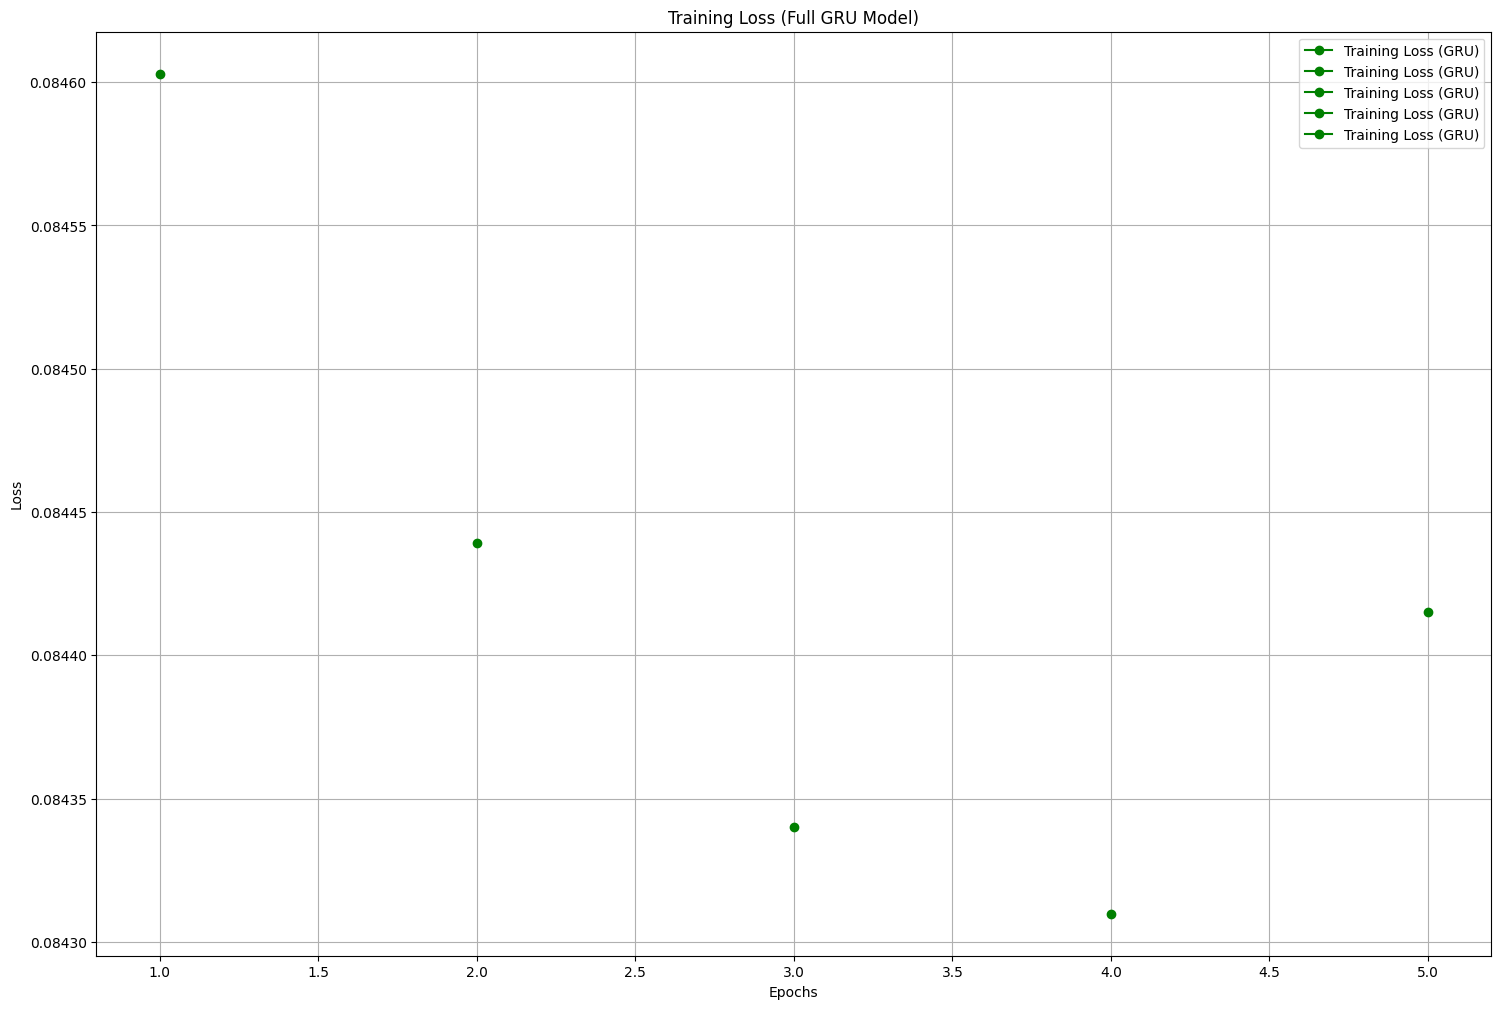

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training MSE (GRU): 0.0841
Test MSE (GRU): 0.0860


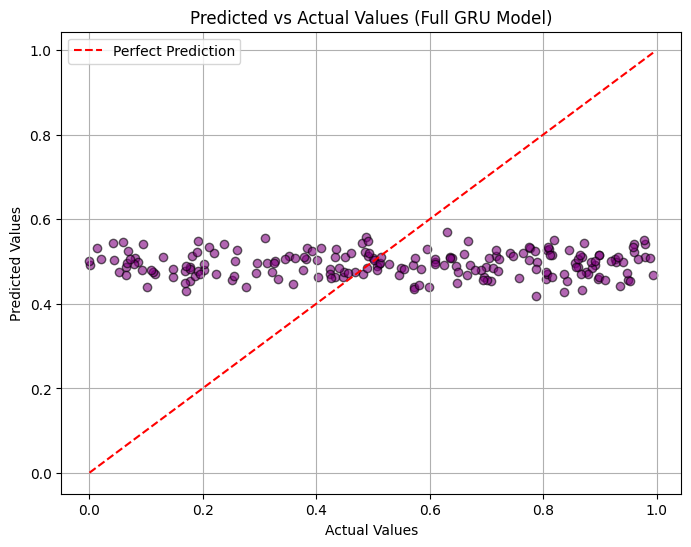

In [55]:
# Lists to store training losses for visualization
train_losses_gru = []

# Training the GRU model with visualization
epoch = 0
train_losses_gru = []  # Ensure this list is initialized outside the loop
while epoch < epochs:
    model3.train()
    total_loss = 0
    batch_iter = iter(train_loader)  # Convert DataLoader to an iterator
    
    while True:
        try:
            X_batch, y_batch = next(batch_iter)  # Get the next batch
            optimizer.zero_grad()
            y_pred = model3(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        except StopIteration:
            break  # Exit the loop when all batches have been processed
    
    # Record average loss per epoch
    train_losses_gru.append(total_loss / len(train_loader))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")
    
    epoch += 1


# Plot Training Loss
epoch = 0
train_losses_gru = []  # Ensure this list is initialized outside the loop

# Training loop
while epoch < epochs:
    model3.train()
    total_loss = 0
    batch_iter = iter(train_loader)  # Convert DataLoader to an iterator
    
    while True:
        try:
            X_batch, y_batch = next(batch_iter)  # Get the next batch
            optimizer.zero_grad()
            y_pred = model3(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        except StopIteration:
            break  # Exit the loop when all batches have been processed
    
    # Record average loss per epoch
    train_losses_gru.append(total_loss / len(train_loader))
    epoch += 1

# Plotting the training loss with a while loop for epochs
epoch = 1
while epoch <= epochs:
    plt.plot(epoch, train_losses_gru[epoch - 1], label='Training Loss (GRU)', marker='o', color='green')
    epoch += 1

plt.title('Training Loss (Full GRU Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# Evaluate the model and visualize predictions vs. actual values
model3.eval()
with torch.no_grad():
    y_pred_test_gru = model3(X_test_tensor)
    y_pred_test_gru = y_pred_test_gru.numpy().flatten()
    y_test_actual_gru = y_test_tensor.numpy().flatten()

    y_pred_train_gru = model3(X_train_tensor)
    train_mse = criterion(y_pred_train_gru, y_train_tensor).item()
    test_mse = criterion(torch.tensor(y_pred_test_gru), y_test_tensor).item()

# Print the MSE values
print(f"Training MSE (GRU): {train_mse:.4f}")
print(f"Test MSE (GRU): {test_mse:.4f}")
# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual_gru, y_pred_test_gru, alpha=0.6, color='purple', edgecolor='k')
plt.plot([min(y_test_actual_gru), max(y_test_actual_gru)], [min(y_test_actual_gru), max(y_test_actual_gru)], 
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values (Full GRU Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


**Model 6: Logistic Regression**

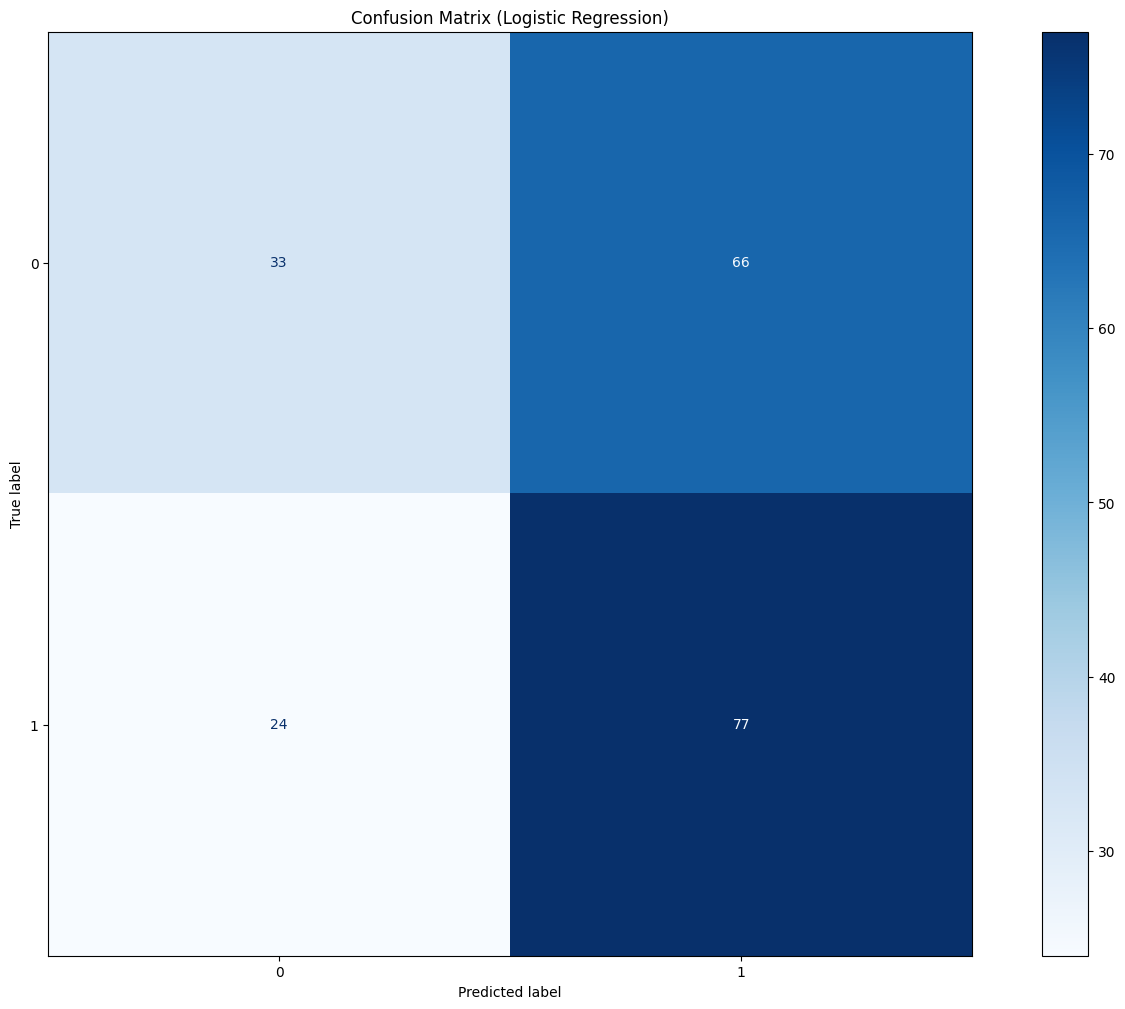

Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.33      0.42        99
           1       0.54      0.76      0.63       101

    accuracy                           0.55       200
   macro avg       0.56      0.55      0.53       200
weighted avg       0.56      0.55      0.53       200



In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Generate Sample Data (Replace this with your actual data)
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = np.random.randint(0, 2, size=(1000,))  # Binary target variable (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define and Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Step 5: Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


# 7 XGBoost Regressor

In [57]:
from xgboost import XGBRegressor # type: ignore
from sklearn.metrics import mean_squared_error
import math
# Build XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
xgb_train_score = mean_squared_error(y_train, xgb_model.predict(X_train))
xgb_test_score = mean_squared_error(y_test, xgb_predictions)
print('XGBoost Train Score: %.4f MSE (%.4f RMSE)' % (xgb_train_score, math.sqrt(xgb_train_score)))
print('XGBoost Test Score: %.4f MSE (%.4f RMSE)' % (xgb_test_score, math.sqrt(xgb_test_score)))


XGBoost Train Score: 0.0328 MSE (0.1810 RMSE)
XGBoost Test Score: 0.2982 MSE (0.5461 RMSE)


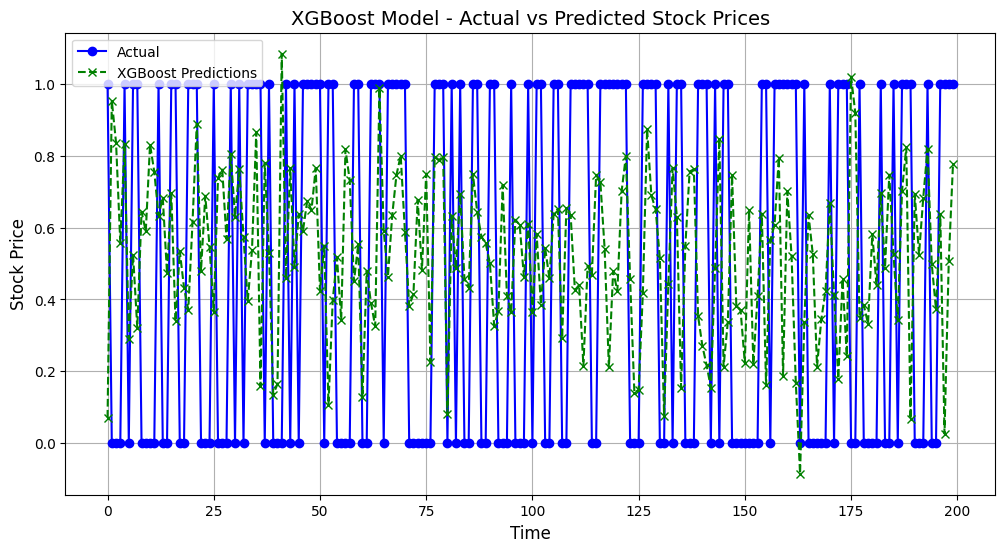

In [58]:
import matplotlib.pyplot as plt

# XGBoost Prediction Plot
def plot_xgb_prediction(y_test, xgb_predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label="Actual", color='blue', linestyle='-', marker='o')
    plt.plot(xgb_predictions, label="XGBoost Predictions", color='green', linestyle='--', marker='x')
    plt.title('XGBoost Model - Actual vs Predicted Stock Prices', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Usage
plot_xgb_prediction(y_test, xgb_predictions)


# Model 8
## SVR (Support Vector Regressor)

In [59]:
from sklearn.svm import SVR

# Build SVR Model
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train, y_train.ravel())

# Make Predictions
svr_predictions = svr_model.predict(X_test)

# Evaluation
svr_train_score = mean_squared_error(y_train, svr_model.predict(X_train))
svr_test_score = mean_squared_error(y_test, svr_predictions)
print('SVR Train Score: %.4f MSE (%.4f RMSE)' % (svr_train_score, math.sqrt(svr_train_score)))
print('SVR Test Score: %.4f MSE (%.4f RMSE)' % (svr_test_score, math.sqrt(svr_test_score)))


SVR Train Score: 0.2582 MSE (0.5081 RMSE)
SVR Test Score: 0.3167 MSE (0.5628 RMSE)


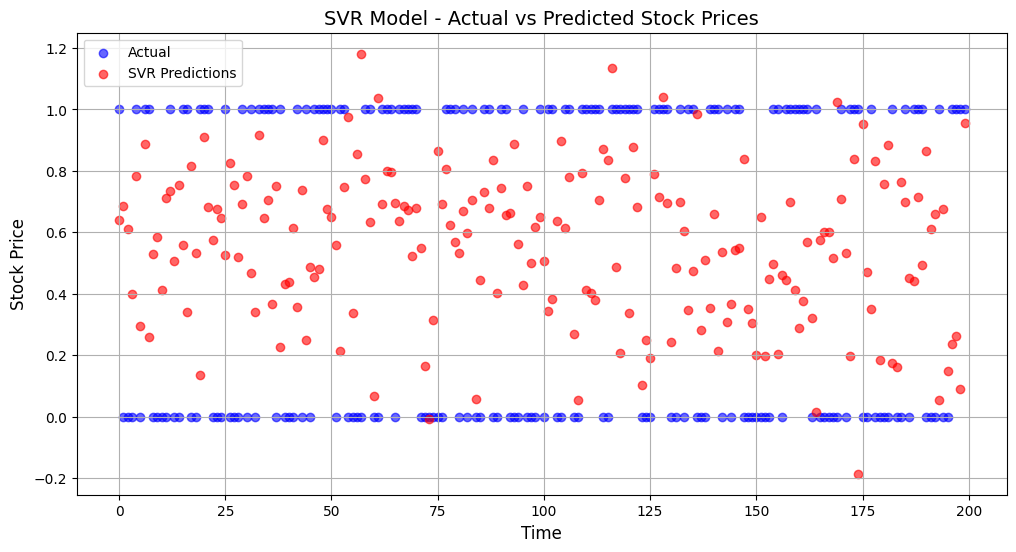

In [60]:
def plot_svr_prediction(y_test, svr_predictions):
    plt.figure(figsize=(12, 6))
    
    # Plot Actual values
    index = 0
    while index < len(y_test):
        plt.scatter(index, y_test[index], color='blue', alpha=0.6)
        index += 1
    
    # Plot SVR Predictions
    index = 0
    while index < len(svr_predictions):
        plt.scatter(index, svr_predictions[index], color='red', alpha=0.6)
        index += 1
    
    # Customize the plot for clarity
    plt.title('SVR Model - Actual vs Predicted Stock Prices', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    
    # Add a legend manually for better control over which labels appear
    plt.scatter([], [], color='blue', alpha=0.6, label="Actual")
    plt.scatter([], [], color='red', alpha=0.6, label="SVR Predictions")
    plt.legend(loc='upper left')
    
    plt.grid(True)
    plt.show()

# Usage
plot_svr_prediction(y_test, svr_predictions)


# Model 9
## Transformer Model

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, LayerNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def unroll(X, unroll_length):
    sequences = []
    labels = []
    
    i = 0
    while i < len(X) - unroll_length:
        sequences.append(X[i:i + unroll_length])  # Sequence of length unroll_length
        labels.append(X[i + unroll_length, 0])  # Predict the next value in the sequence (single feature)
        i += 1

    return np.array(sequences), np.array(labels).reshape(-1, 1)  # Ensure labels have shape (batch_size, 1)


unroll_length = 50
X_train_unrolled, y_train_unrolled = unroll(X_train, unroll_length)
X_test_unrolled, y_test_unrolled = unroll(X_test, unroll_length)

# Ensure the input shape is correct (batch_size, unroll_length, features)
print("X_train shape:", X_train_unrolled.shape)
print("y_train shape:", y_train_unrolled.shape)
print("X_test shape:", X_test_unrolled.shape)
print("y_test shape:", y_test_unrolled.shape)

# Define the Transformer model
def build_transformer(input_dim, seq_length):
    inputs = Input(shape=(seq_length, input_dim))  # Expecting input of shape (None, 50, features)
    x = MultiHeadAttention(num_heads=4, key_dim=input_dim)(inputs, inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(1)(x)  # Output a single value (next time step prediction)
    model = Model(inputs, x)
    return model

# Build and compile the Transformer model
transformer_model = build_transformer(X_train_unrolled.shape[-1], unroll_length)
transformer_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Transformer model
transformer_model.fit(X_train_unrolled, y_train_unrolled, epochs=5, batch_size=32, validation_split=0.05)

# Make predictions with the Transformer model
train_predictions = transformer_model.predict(X_train_unrolled)
test_predictions = transformer_model.predict(X_test_unrolled)

# Reshape predictions to match the target shape for MSE calculation
train_predictions_reshaped = train_predictions[:, -1, 0]  # Use the last time step
test_predictions_reshaped = test_predictions[:, -1, 0]  # Use the last time step

# Calculate the MSE for training and test datasets
train_mse3 = mean_squared_error(y_train_unrolled, train_predictions_reshaped)
test_mse3 = mean_squared_error(y_test_unrolled, test_predictions_reshaped)

print(f"Training MSE: {train_mse3}")
print(f"Testing MSE: {test_mse3}")
transformer_predictions = transformer_model.predict(X_test_unrolled)


X_train shape: (750, 50, 5)
y_train shape: (750, 1)
X_test shape: (150, 50, 5)
y_test shape: (150, 1)
Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.2211 - val_loss: 0.0814
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0928 - val_loss: 0.0814
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0903 - val_loss: 0.0819
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0920 - val_loss: 0.0835
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0898 - val_loss: 0.0820
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training MSE: 0.0894254692736874
Testing MSE: 0.08026485402393187
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


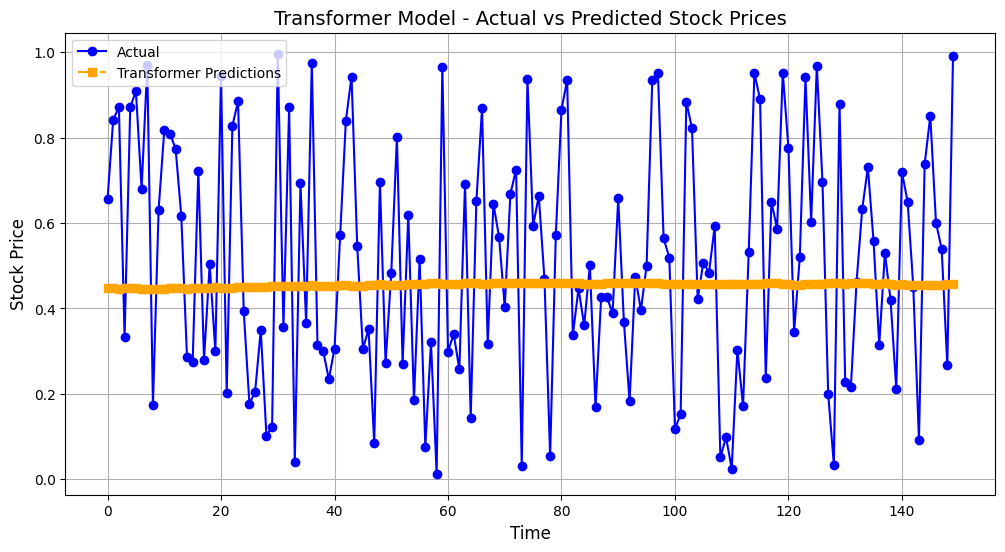

In [62]:
transformer_predictions_reshaped = transformer_predictions[:, -1, 0]  # Get the last time step from each prediction

# Plot the actual vs predicted stock prices using a unique plot for the Transformer model
def plot_transformer_prediction(y_test, transformer_predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label="Actual", color='blue', linestyle='-', marker='o')
    plt.plot(transformer_predictions, label="Transformer Predictions", color='orange', linestyle='-.', marker='s')
    plt.title('Transformer Model - Actual vs Predicted Stock Prices', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Usage of the plotting function with reshaped transformer predictions
plot_transformer_prediction(y_test_unrolled, transformer_predictions_reshaped)

         Model  Train Score (MSE)  Test Score (MSE)  Test Score (RMSE)
0      XGBoost           0.032752          0.298184           0.546063
1          SVR           0.258164          0.316749           0.562805
2  Transformer           0.089425          0.080265           0.283311


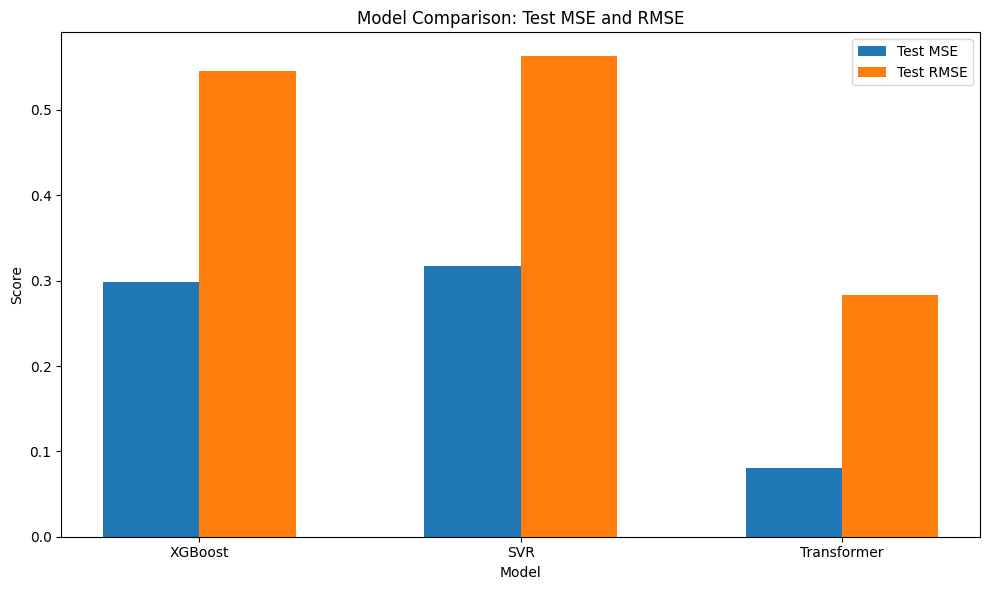

In [63]:
import numpy as np
import math
import pandas as pd
from sklearn.metrics import mean_squared_error

rmse_xgb = math.sqrt(xgb_test_score)
rmse_svr = math.sqrt(svr_test_score)
rmse_transformer = math.sqrt(test_mse3)

models_scores = {
    'Model': ['XGBoost', 'SVR', 'Transformer'],
    'Train Score (MSE)': [xgb_train_score, svr_train_score, train_mse3],  # Replace with actual train MSE if needed
    'Test Score (MSE)': [xgb_test_score, svr_test_score, test_mse3],
    'Test Score (RMSE)': [rmse_xgb, rmse_svr, rmse_transformer]
}

# Create a DataFrame for better readability
scores_df = pd.DataFrame(models_scores)

# Print the results
print(scores_df)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting MSE and RMSE for each model
bar_width = 0.3
index = np.arange(len(models_scores['Model']))

bar1 = ax.bar(index - bar_width/2, scores_df['Test Score (MSE)'], bar_width, label='Test MSE')
bar2 = ax.bar(index + bar_width/2, scores_df['Test Score (RMSE)'], bar_width, label='Test RMSE')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Test MSE and RMSE')
ax.set_xticks(index)
ax.set_xticklabels(scores_df['Model'])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

**Model 10**

**Random Forest Regressor**

In [64]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Open     Close    Volume
0  0.941008  0.927501  0.032906
1  0.940256  0.952798  0.027257
2  0.952177  0.938704  0.023557
3  0.983122  0.964885  0.012217
4  0.967322  0.980157  0.012782

In [66]:
# Split features (X) and target (y)
X = stocks_data[['Open', 'Volume']]  # Features
y = stocks_data['Close']  # Target


In [67]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Handle NaN values using NumPy
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

In [69]:
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())


NaN in X_train: 0
NaN in X_test: Open      0
Volume    0
dtype: int64
NaN in y_train: 0
NaN in y_test: 0


In [70]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [71]:
# Predict on the test set
y_pred = random_forest_model.predict(X_test)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [72]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0073


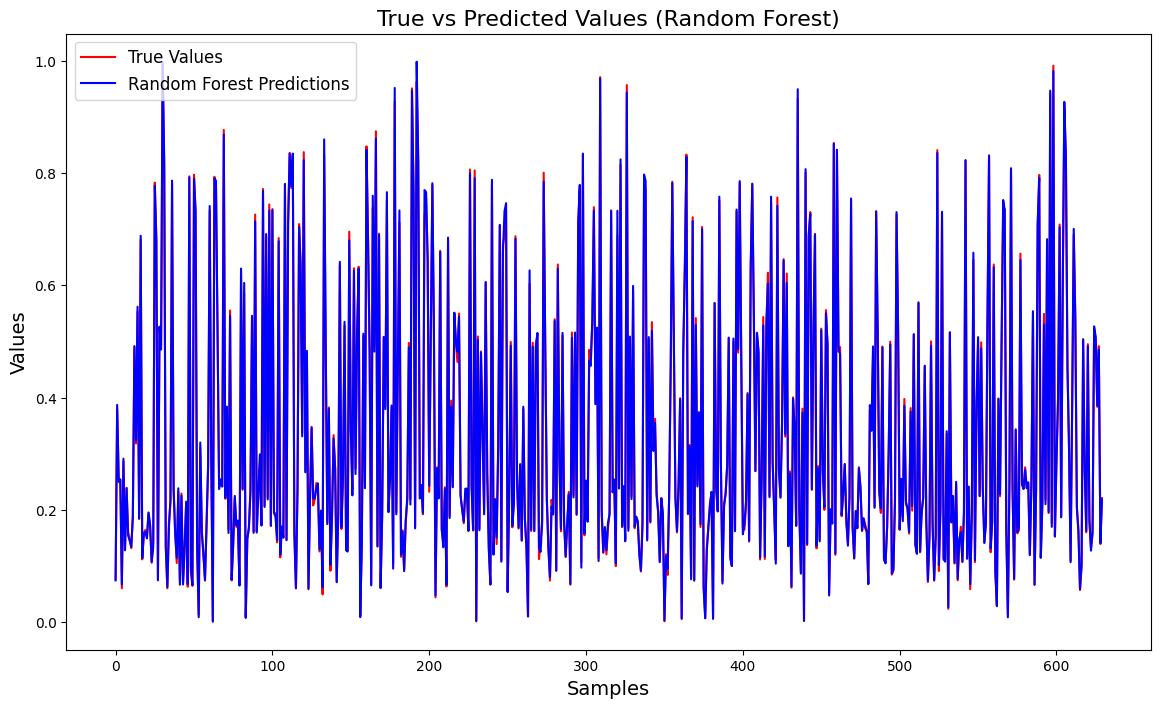

In [73]:
import matplotlib.pyplot as plt

# Plot predictions for Random Forest along with true values
plt.figure(figsize=(14, 8))

# Plot true values
plt.plot(y_test, label='True Values', color='red')

# Plot predictions from the Random Forest model
plt.plot(y_pred, label='Random Forest Predictions', color='blue')

# Add title and labels
plt.title('True vs Predicted Values (Random Forest)', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.show()


**Model 11**

**LightGBM Regressor**

In [74]:
from lightgbm import LGBMRegressor

# Initialize the LightGBM Regressor
lightgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
lightgbm_model.fit(X_train, y_train)

# Predict on the test set
lgbm_predictions = lightgbm_model.predict(X_test)

# Evaluate the model
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_rmse = np.sqrt(lgbm_mse)

print(f"LightGBM Mean Squared Error (MSE): {lgbm_mse:.4f}")
print(f"LightGBM Root Mean Squared Error (RMSE): {lgbm_rmse:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 2516, number of used features: 2
[LightGBM] [Info] Start training from score 0.317358
LightGBM Mean Squared Error (MSE): 0.0001
LightGBM Root Mean Squared Error (RMSE): 0.0076


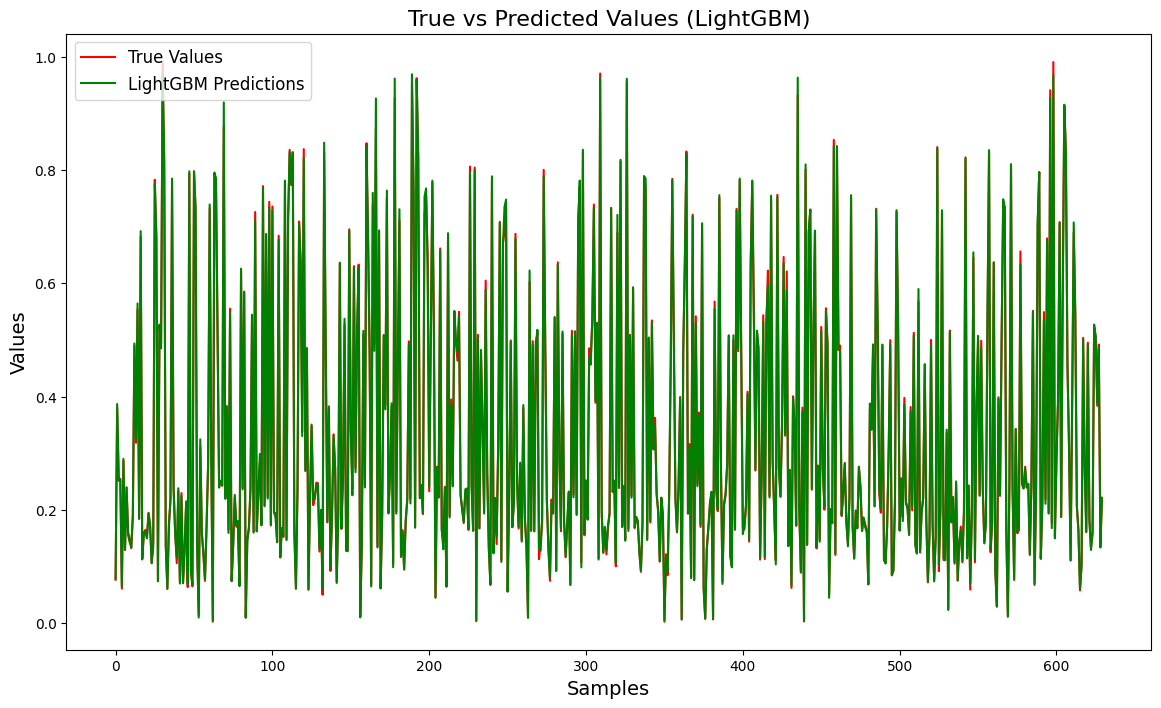

In [75]:
# Plot predictions for LightGBM along with true values
plt.figure(figsize=(14, 8))

# Plot true values
plt.plot(y_test, label='True Values', color='red')

# Plot predictions from the LightGBM model
plt.plot(lgbm_predictions, label='LightGBM Predictions', color='green')

# Add title and labels
plt.title('True vs Predicted Values (LightGBM)', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.show()

**Model 12**

**Gradient Boosting Regressor**

In [76]:
# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the test set
gbr_predictions = gbr_model.predict(X_test)

# Evaluate the model
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(gbr_mse)

print(f"Gradient Boosting Mean Squared Error (MSE): {gbr_mse:.4f}")
print(f"Gradient Boosting Root Mean Squared Error (RMSE): {gbr_rmse:.4f}")


Gradient Boosting Mean Squared Error (MSE): 0.0000
Gradient Boosting Root Mean Squared Error (RMSE): 0.0066


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


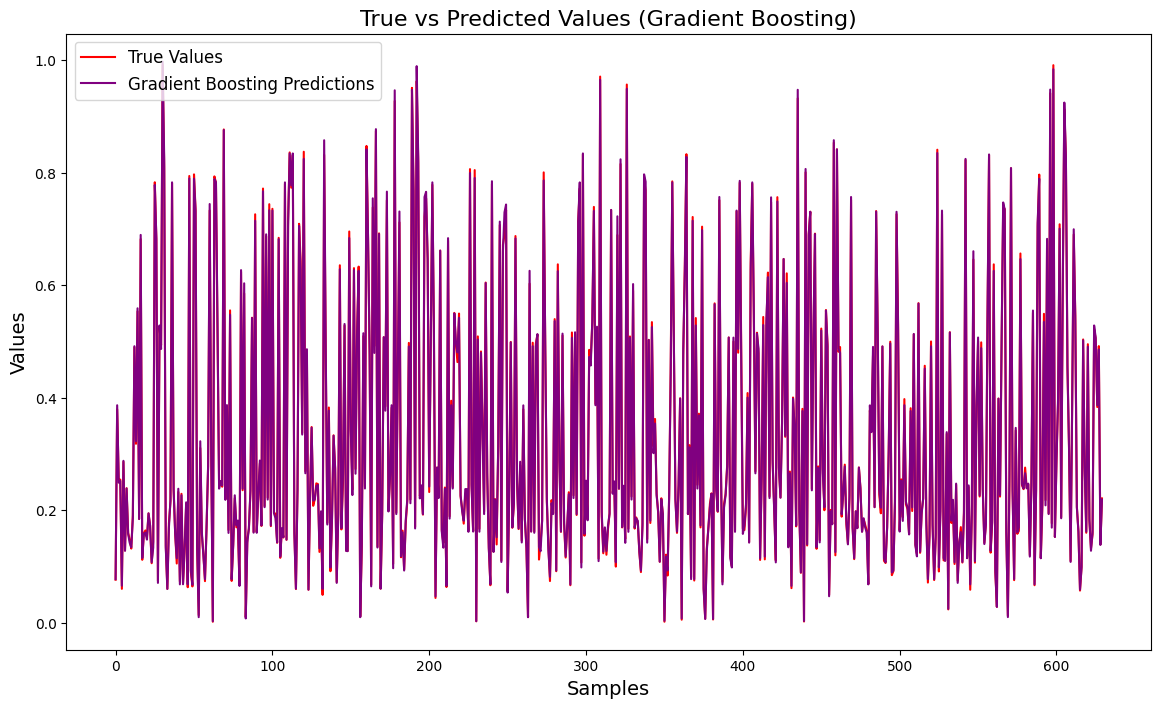

In [77]:
# Plot predictions for Gradient Boosting Regressor along with true values
plt.figure(figsize=(14, 8))

# Plot true values
plt.plot(y_test, label='True Values', color='red')

# Plot predictions from the Gradient Boosting Regressor
plt.plot(gbr_predictions, label='Gradient Boosting Predictions', color='purple')

# Add title and labels
plt.title('True vs Predicted Values (Gradient Boosting)', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.show()

Model 13: Multi-Layer Perceptron (MLP)

In [78]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model 13: Multi-Layer Perceptron
model13 = Sequential()
model13.add(Dense(256, activation='relu', input_dim=X_train.shape[-1]))  # First Dense Layer
model13.add(Dropout(0.2))  # Dropout for regularization
model13.add(Dense(128, activation='relu'))  # Second Dense Layer
model13.add(Dense(1))  # Output Layer

model13.compile(optimizer='adam', loss='mean_squared_error')  # Compile the Model
print("Model 13 (Multi-Layer Perceptron) compiled.")

# Train the model
history13 = model13.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=5,
    verbose=2,
    validation_split=0.05
)
print("Training completed for Model 13.")

Model 13 (Multi-Layer Perceptron) compiled.
Epoch 1/5


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 - 3s - 118ms/step - loss: 0.0266 - val_loss: 0.0024
Epoch 2/5
24/24 - 0s - 13ms/step - loss: 0.0016 - val_loss: 2.6272e-04
Epoch 3/5
24/24 - 0s - 14ms/step - loss: 9.0688e-04 - val_loss: 2.0051e-04
Epoch 4/5
24/24 - 0s - 13ms/step - loss: 7.0906e-04 - val_loss: 1.8231e-04
Epoch 5/5
24/24 - 0s - 13ms/step - loss: 6.0634e-04 - val_loss: 1.7418e-04
Training completed for Model 13.


In [79]:
# Evaluate the model
train_score13 = model13.evaluate(X_train, y_train, verbose=0)
test_score13 = model13.evaluate(X_test, y_test, verbose=0)

print(f'Model 13 - Train Score: {train_score13:.8f} MSE')
print(f'Model 13 - Test Score: {test_score13:.8f} MSE')

Model 13 - Train Score: 0.00012153 MSE
Model 13 - Test Score: 0.00012917 MSE


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


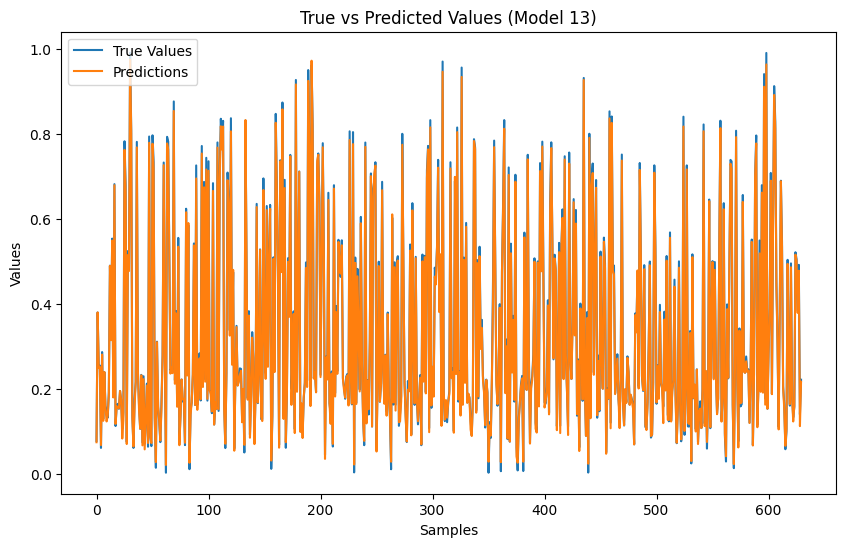

In [80]:
# Generate predictions
predictions13 = model13.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions13, label='Predictions')
plt.title('True vs Predicted Values (Model 13)')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()

Model 14: ElasticNet Regression

In [81]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Model 14: ElasticNet Regression for Stock Price Prediction

# Initialize the ElasticNet model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [82]:
# Evaluate the model
train_score_en = mean_squared_error(y_train, elastic_net_model.predict(X_train))
test_score_en = mean_squared_error(y_test, elastic_net_model.predict(X_test))

print(f'Model 14 - Train Score: {train_score_en:.8f} MSE')
print(f'Model 14 - Test Score: {test_score_en:.8f} MSE')

Model 14 - Train Score: 0.05005850 MSE
Model 14 - Test Score: 0.05650352 MSE


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


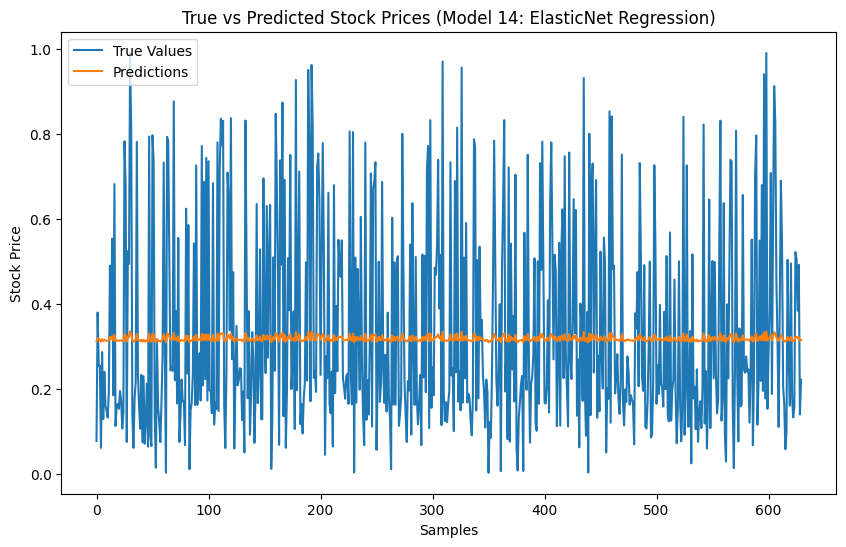

In [83]:
# Generate predictions
predictions_en = elastic_net_model.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions_en, label='Predictions')
plt.title('True vs Predicted Stock Prices (Model 14: ElasticNet Regression)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Model 15: Ridge Regression

In [84]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Model 15: Ridge Regression for Stock Price Prediction

# Initialize the Ridge model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

Ridge()

In [85]:
# Evaluate the model
train_score_ridge = mean_squared_error(y_train, ridge_model.predict(X_train))
test_score_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))

print(f'Model 15 - Train Score: {train_score_ridge:.8f} MSE')
print(f'Model 15 - Test Score: {test_score_ridge:.8f} MSE')

Model 15 - Train Score: 0.00003240 MSE
Model 15 - Test Score: 0.00004129 MSE


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


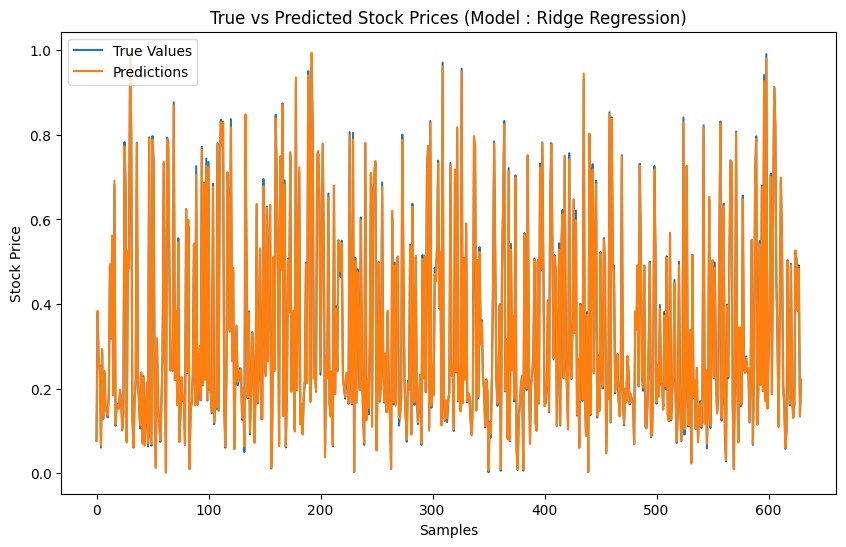

In [86]:
# Generate predictions
predictions_ridge = ridge_model.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions_ridge, label='Predictions')
plt.title('True vs Predicted Stock Prices (Model : Ridge Regression)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Model 16: Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Model 30: Lasso Regression for Stock Price Prediction

# Initialize the Lasso model
lasso_model = Lasso(alpha=0.01)

# Train the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [88]:
# Evaluate the model
train_score_lasso = mean_squared_error(y_train, lasso_model.predict(X_train))
test_score_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))

print(f'Model 30 - Train Score: {train_score_lasso:.8f} MSE')
print(f'Model 30 - Test Score: {test_score_lasso:.8f} MSE')

Model 30 - Train Score: 0.00193029 MSE
Model 30 - Test Score: 0.00214005 MSE


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


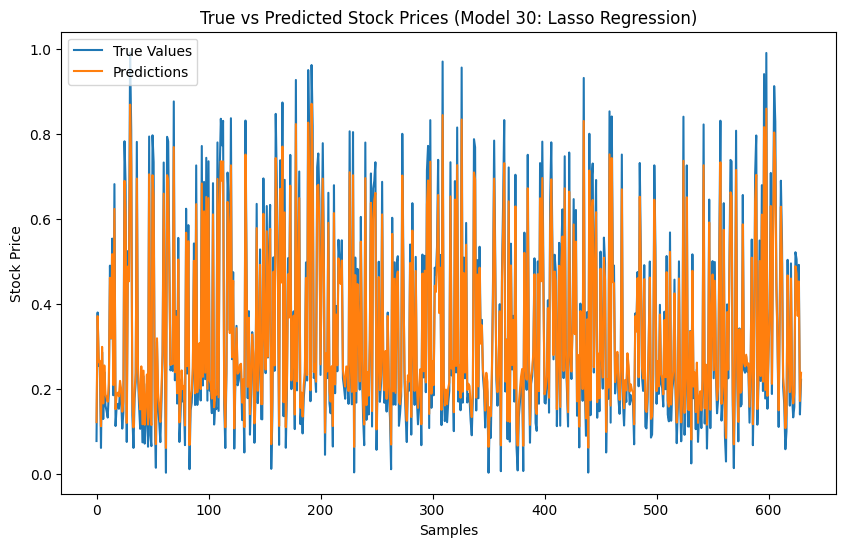

In [89]:
# Generate predictions
predictions_lasso = lasso_model.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions_lasso, label='Predictions')
plt.title('True vs Predicted Stock Prices (Model 30: Lasso Regression)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Model Performances Comparisons (MLP,Elastic,Lasso,Ridge)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model 13 (MLP) - Train MSE: 0.00012153, Test MSE: 0.00012917
Model 14 (ElasticNet) - Train MSE: 0.05005850, Test MSE: 0.05650352
Model 15 (Ridge) - Train MSE: 0.00003240, Test MSE: 0.00004129
Model 16 (Lasso) - Train MSE: 0.00193029, Test MSE: 0.00214005


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  w

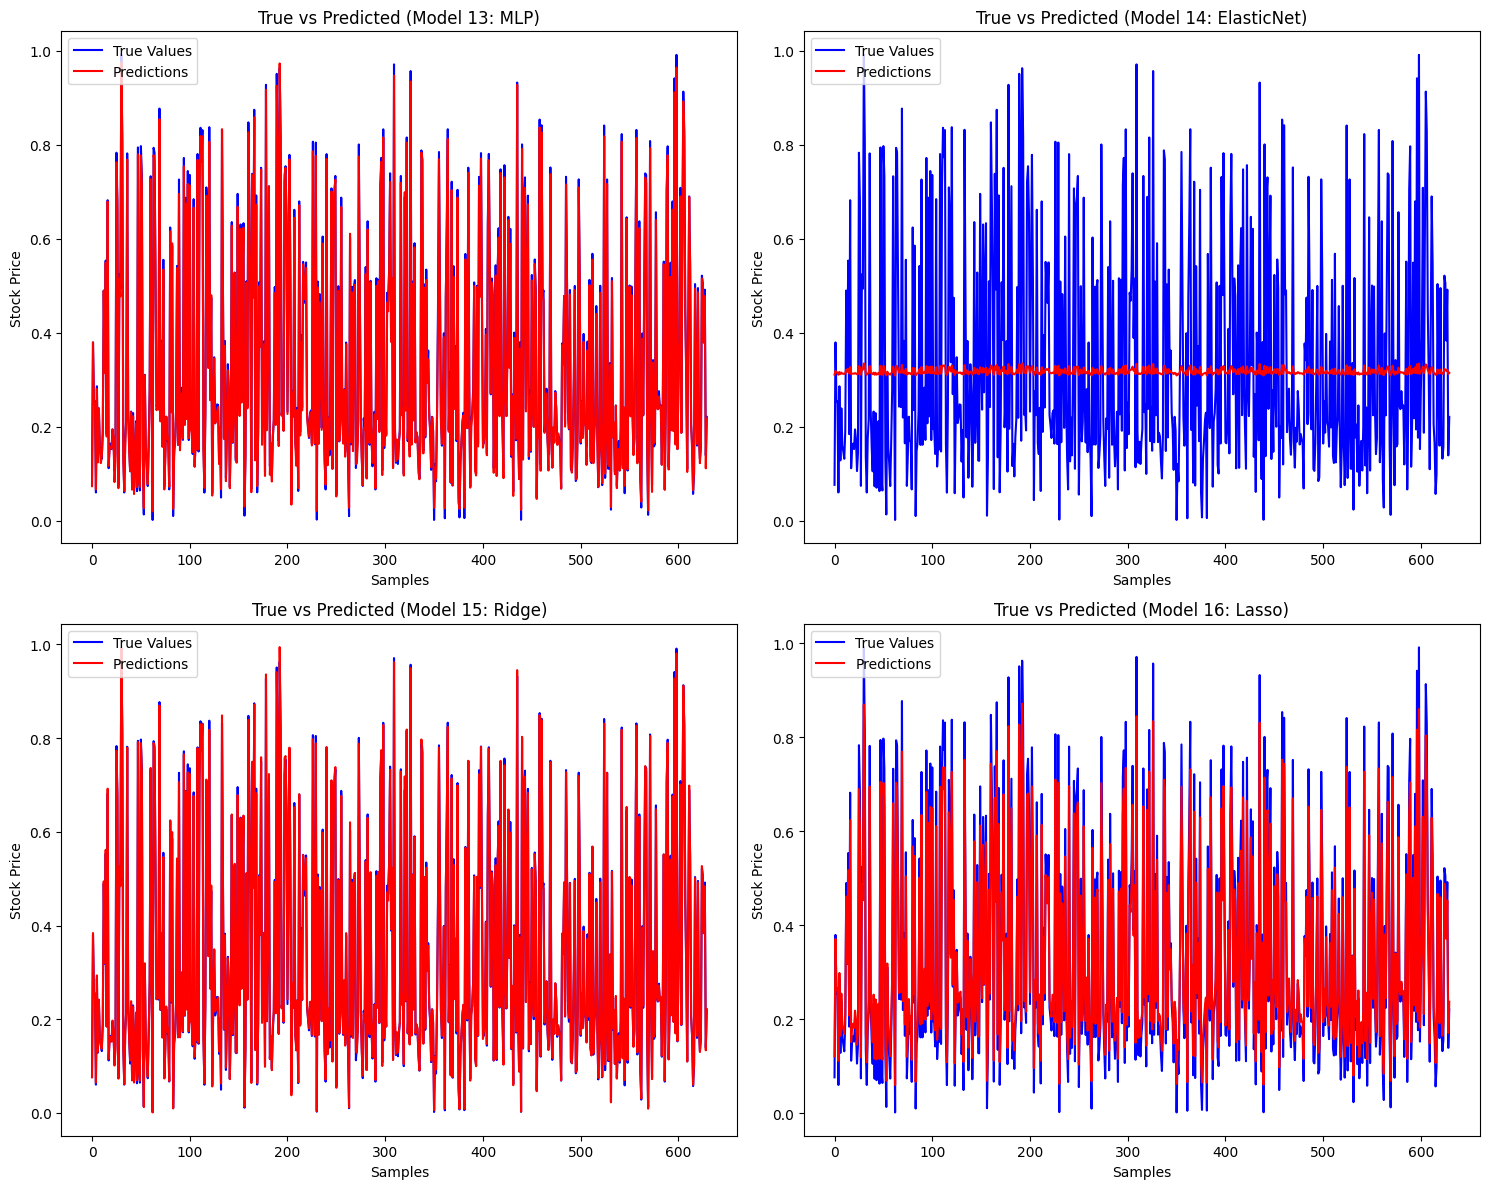

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Model 13: MLP (already trained)
train_score13 = model13.evaluate(X_train, y_train, verbose=0)
test_score13 = model13.evaluate(X_test, y_test, verbose=0)
predictions13 = model13.predict(X_test)

# Model 14: ElasticNet
train_score_en = mean_squared_error(y_train, elastic_net_model.predict(X_train))
test_score_en = mean_squared_error(y_test, elastic_net_model.predict(X_test))
predictions_en = elastic_net_model.predict(X_test)

# Model 15: Ridge
train_score_ridge = mean_squared_error(y_train, ridge_model.predict(X_train))
test_score_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))
predictions_ridge = ridge_model.predict(X_test)

# Model 16: Lasso
train_score_lasso = mean_squared_error(y_train, lasso_model.predict(X_train))
test_score_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))
predictions_lasso = lasso_model.predict(X_test)

# Print the MSE for each model
print(f'Model 13 (MLP) - Train MSE: {train_score13:.8f}, Test MSE: {test_score13:.8f}')
print(f'Model 14 (ElasticNet) - Train MSE: {train_score_en:.8f}, Test MSE: {test_score_en:.8f}')
print(f'Model 15 (Ridge) - Train MSE: {train_score_ridge:.8f}, Test MSE: {test_score_ridge:.8f}')
print(f'Model 16 (Lasso) - Train MSE: {train_score_lasso:.8f}, Test MSE: {test_score_lasso:.8f}')

# Plot True vs Predicted for each model
plt.figure(figsize=(15, 12))

# Model 13: MLP
plt.subplot(2, 2, 1)
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions13, label='Predictions', color='red')
plt.title('True vs Predicted (Model 13: MLP)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()

# Model 28: ElasticNet
plt.subplot(2, 2, 2)
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions_en, label='Predictions', color='red')
plt.title('True vs Predicted (Model 14: ElasticNet)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()

# Model 29: Ridge
plt.subplot(2, 2, 3)
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions_ridge, label='Predictions', color='red')
plt.title('True vs Predicted (Model 15: Ridge)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()

# Model 30: Lasso
plt.subplot(2, 2, 4)
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions_lasso, label='Predictions', color='red')
plt.title('True vs Predicted (Model 16: Lasso)')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()
